In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# 读取CSV文件到DataFrame中
df = pd.read_csv("Results_21Mar2022.csv")

df.columns


Index(['mc_run_id', 'grouping', 'mean_ghgs', 'mean_land', 'mean_watscar',
       'mean_eut', 'mean_ghgs_ch4', 'mean_ghgs_n2o', 'mean_bio', 'mean_watuse',
       'mean_acid', 'sd_ghgs', 'sd_land', 'sd_watscar', 'sd_eut',
       'sd_ghgs_ch4', 'sd_ghgs_n2o', 'sd_bio', 'sd_watuse', 'sd_acid',
       'n_participants', 'sex', 'diet_group', 'age_group'],
      dtype='object')

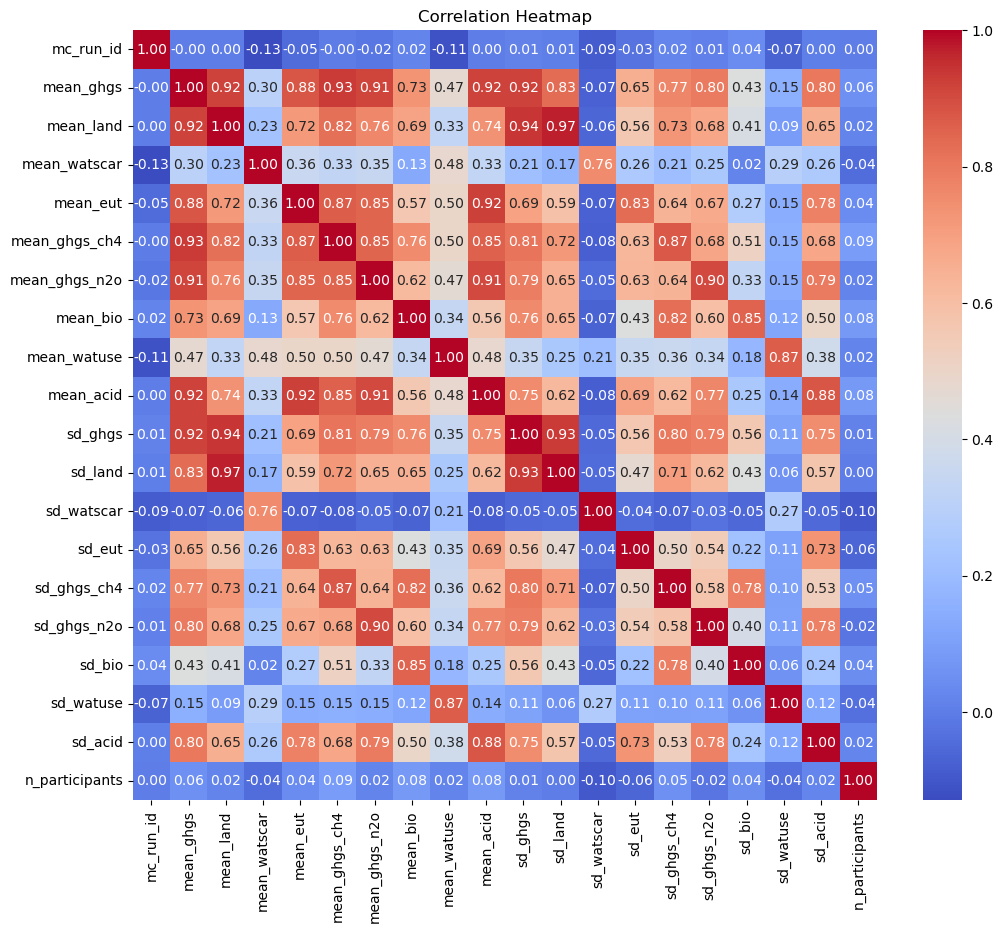

In [75]:
correlation_matrix = df[['mc_run_id', 'mean_ghgs', 'mean_land', 'mean_watscar',
       'mean_eut', 'mean_ghgs_ch4', 'mean_ghgs_n2o', 'mean_bio', 'mean_watuse',
       'mean_acid', 'sd_ghgs', 'sd_land', 'sd_watscar', 'sd_eut',
       'sd_ghgs_ch4', 'sd_ghgs_n2o', 'sd_bio', 'sd_watuse', 'sd_acid',
       'n_participants', ]].corr(method='pearson')

# Draw Hotmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

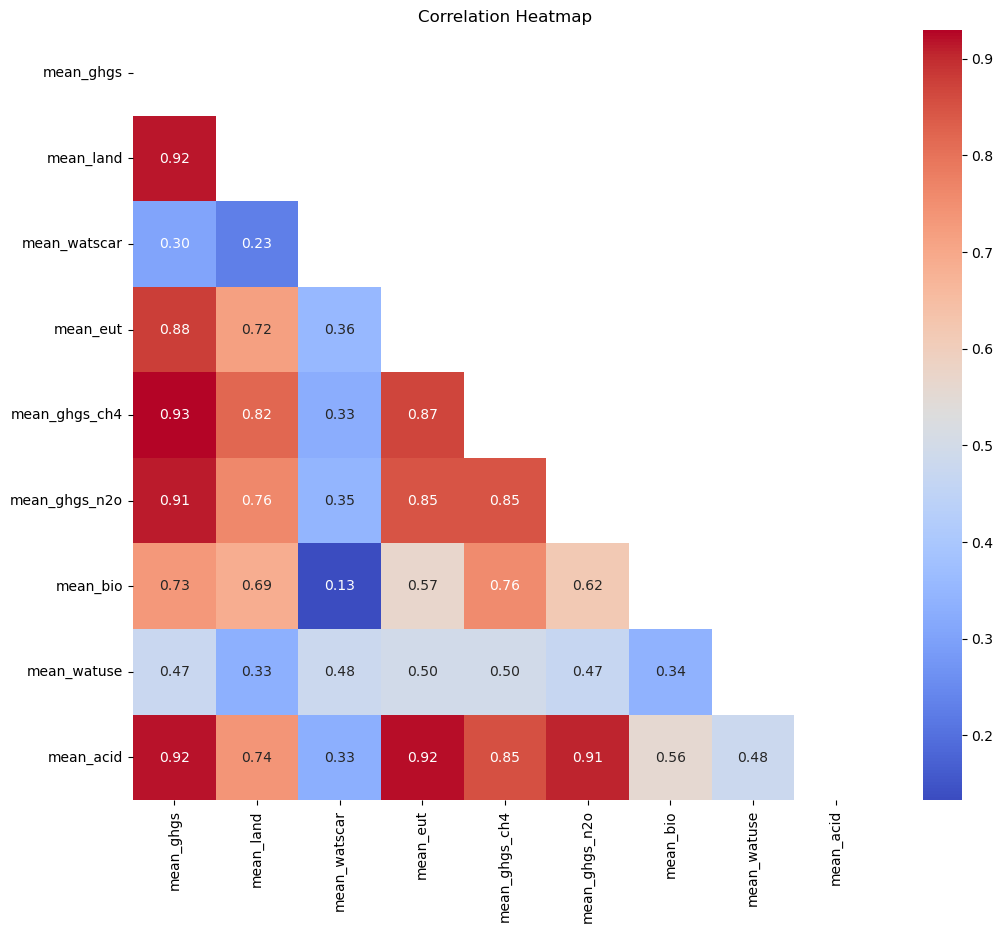

In [76]:
correlation_matrix = df[['mean_ghgs', 'mean_land', 'mean_watscar', 'mean_eut', 'mean_ghgs_ch4', 'mean_ghgs_n2o', 'mean_bio', 'mean_watuse', 'mean_acid']].corr(method='pearson')


# Create a mask to hide the upper triangle of the correlation matrix
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True
# Draw Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',mask = mask, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()




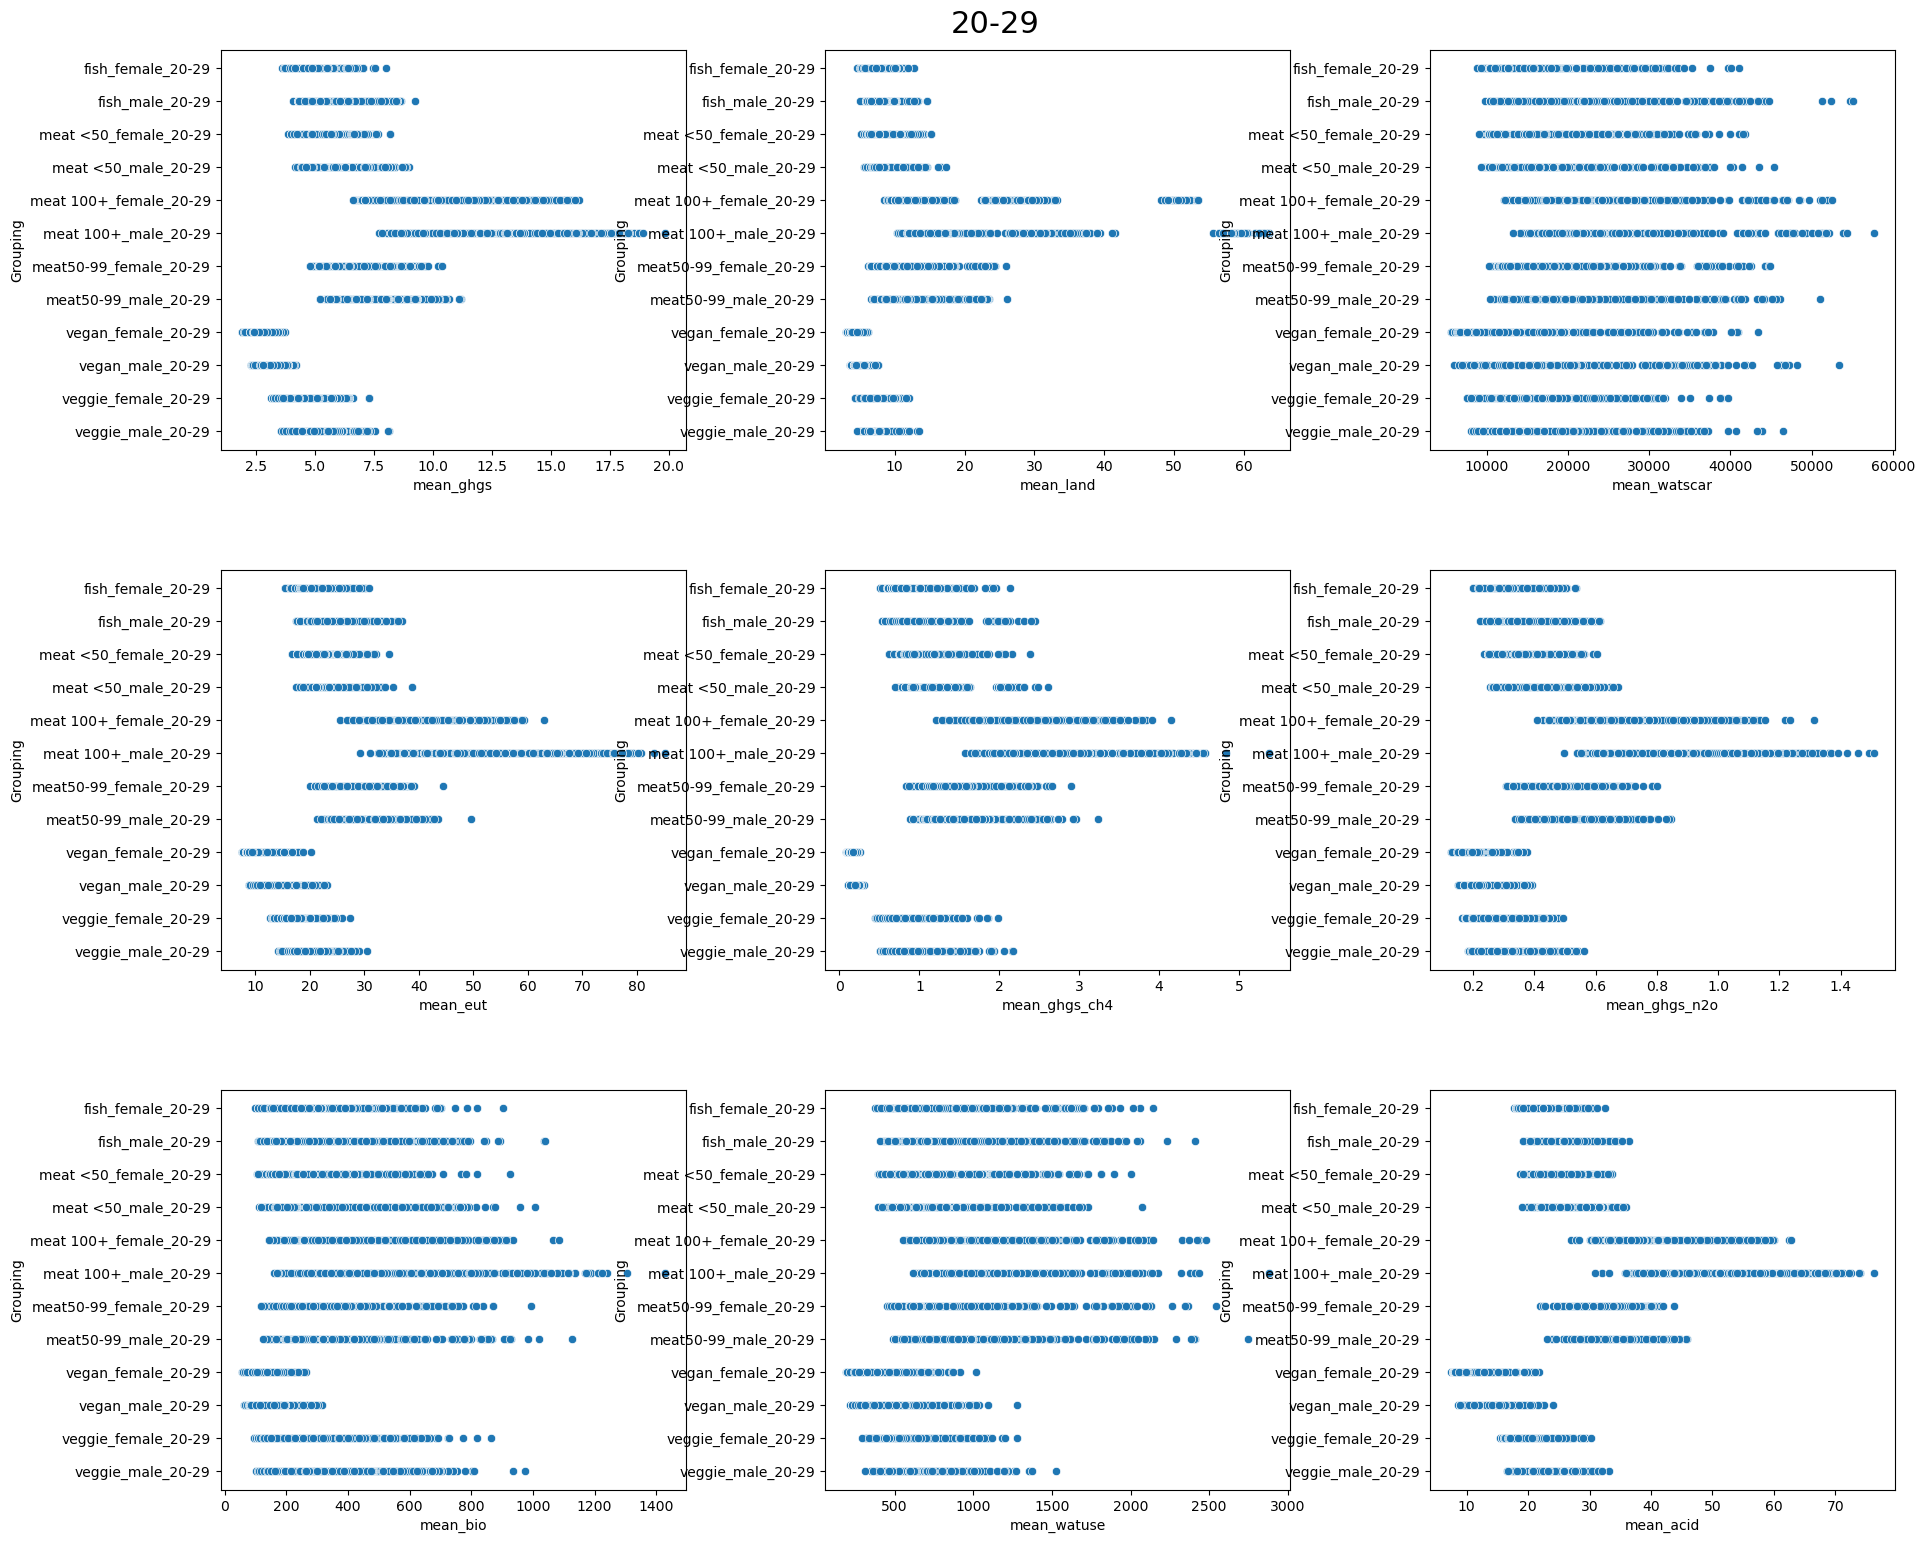

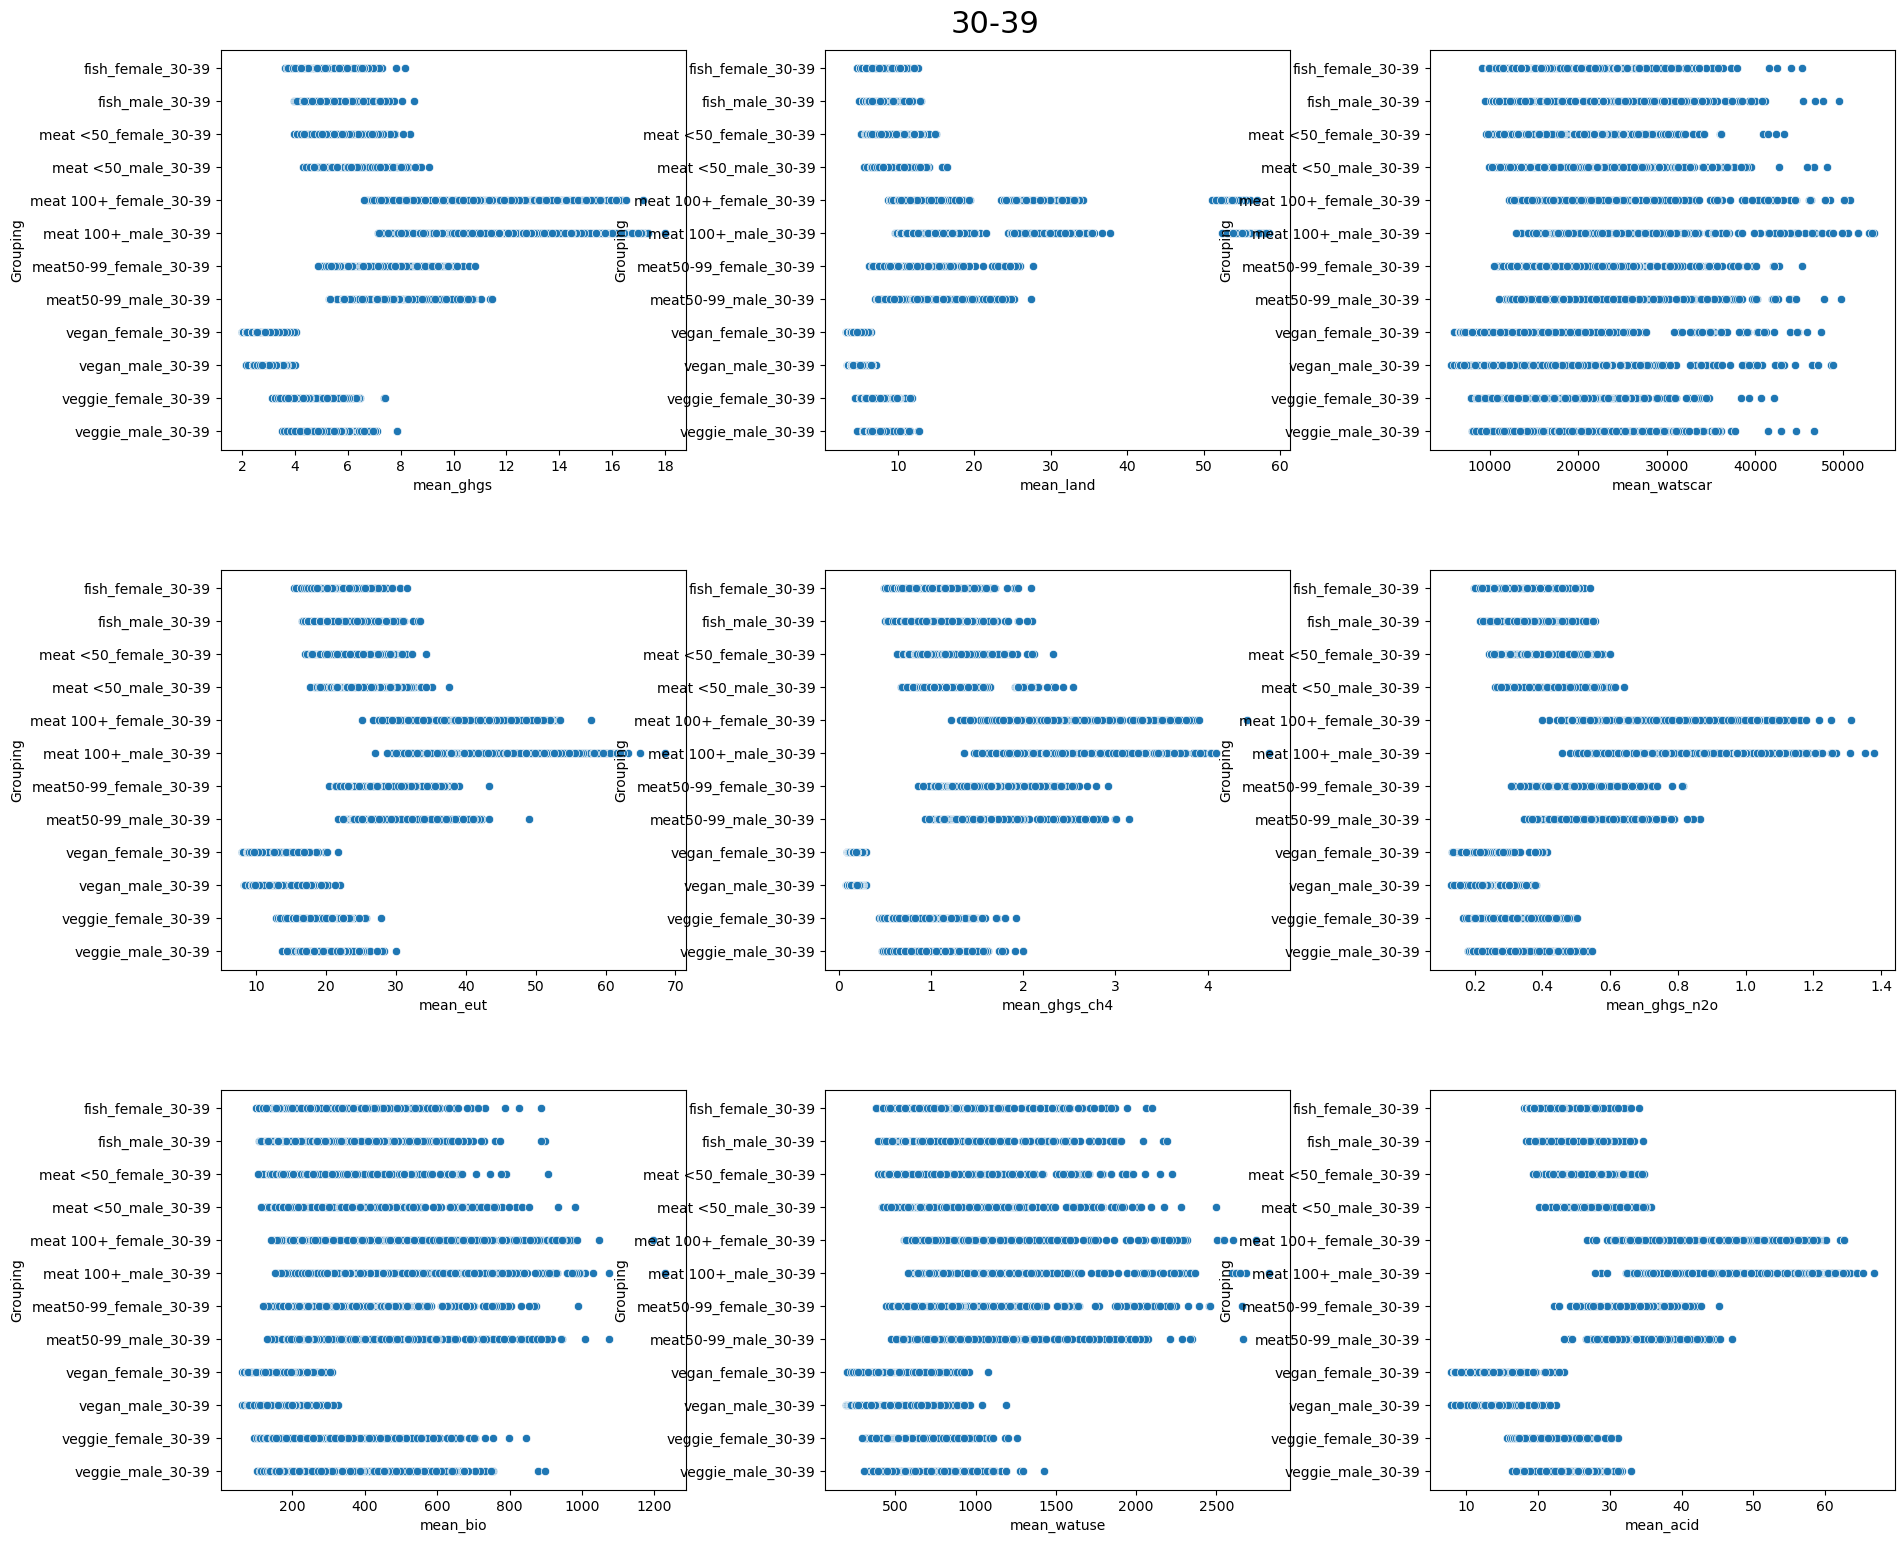

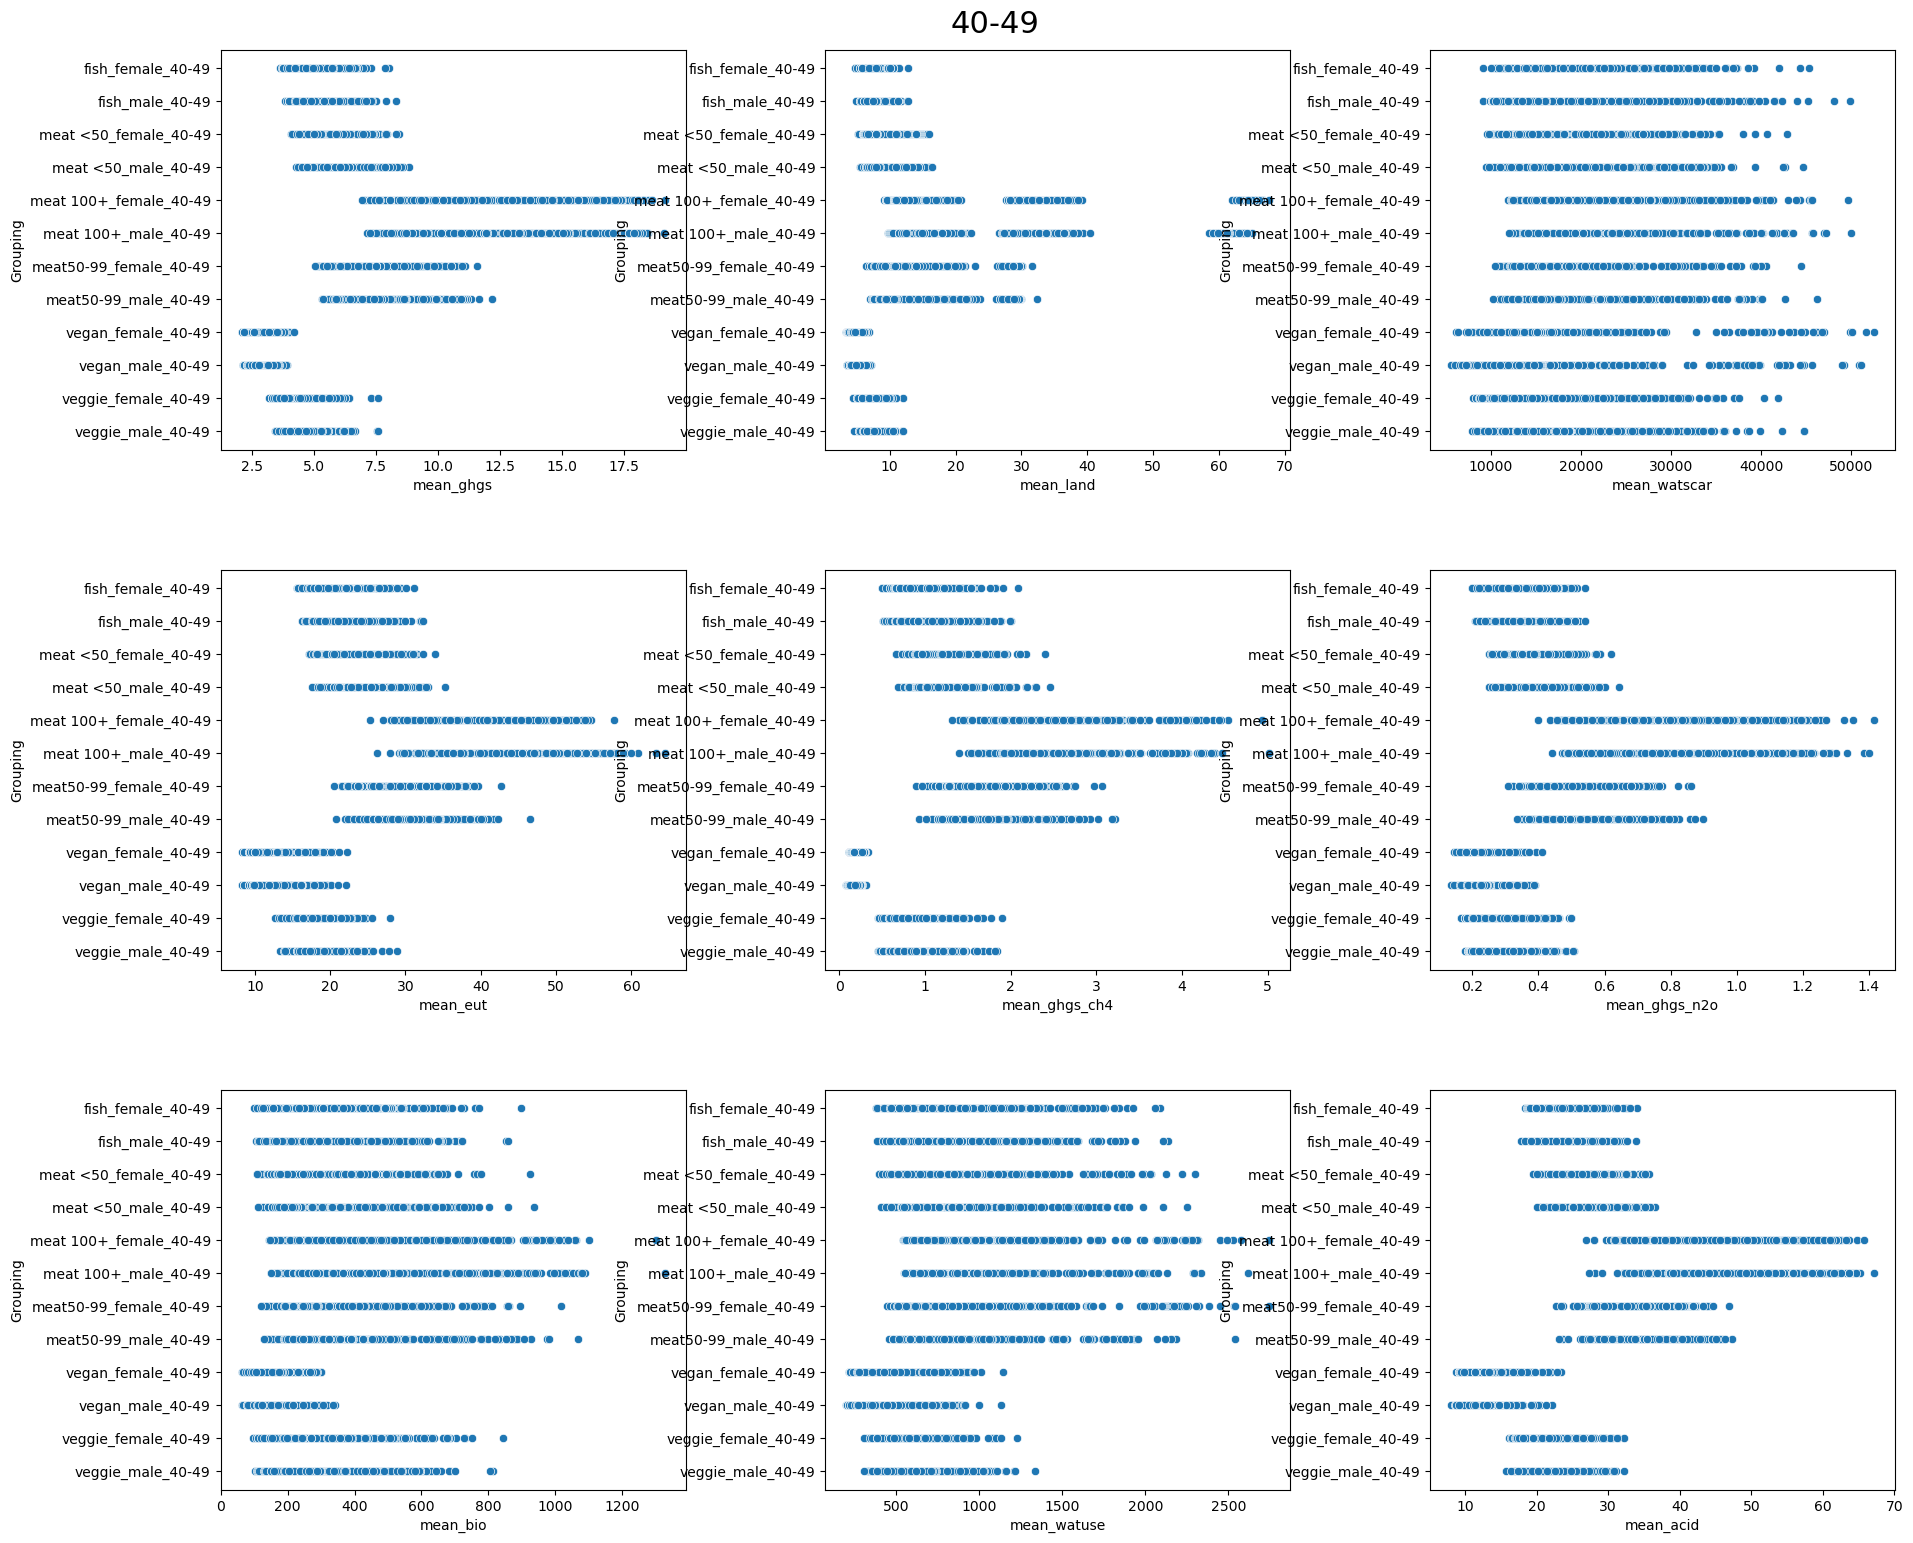

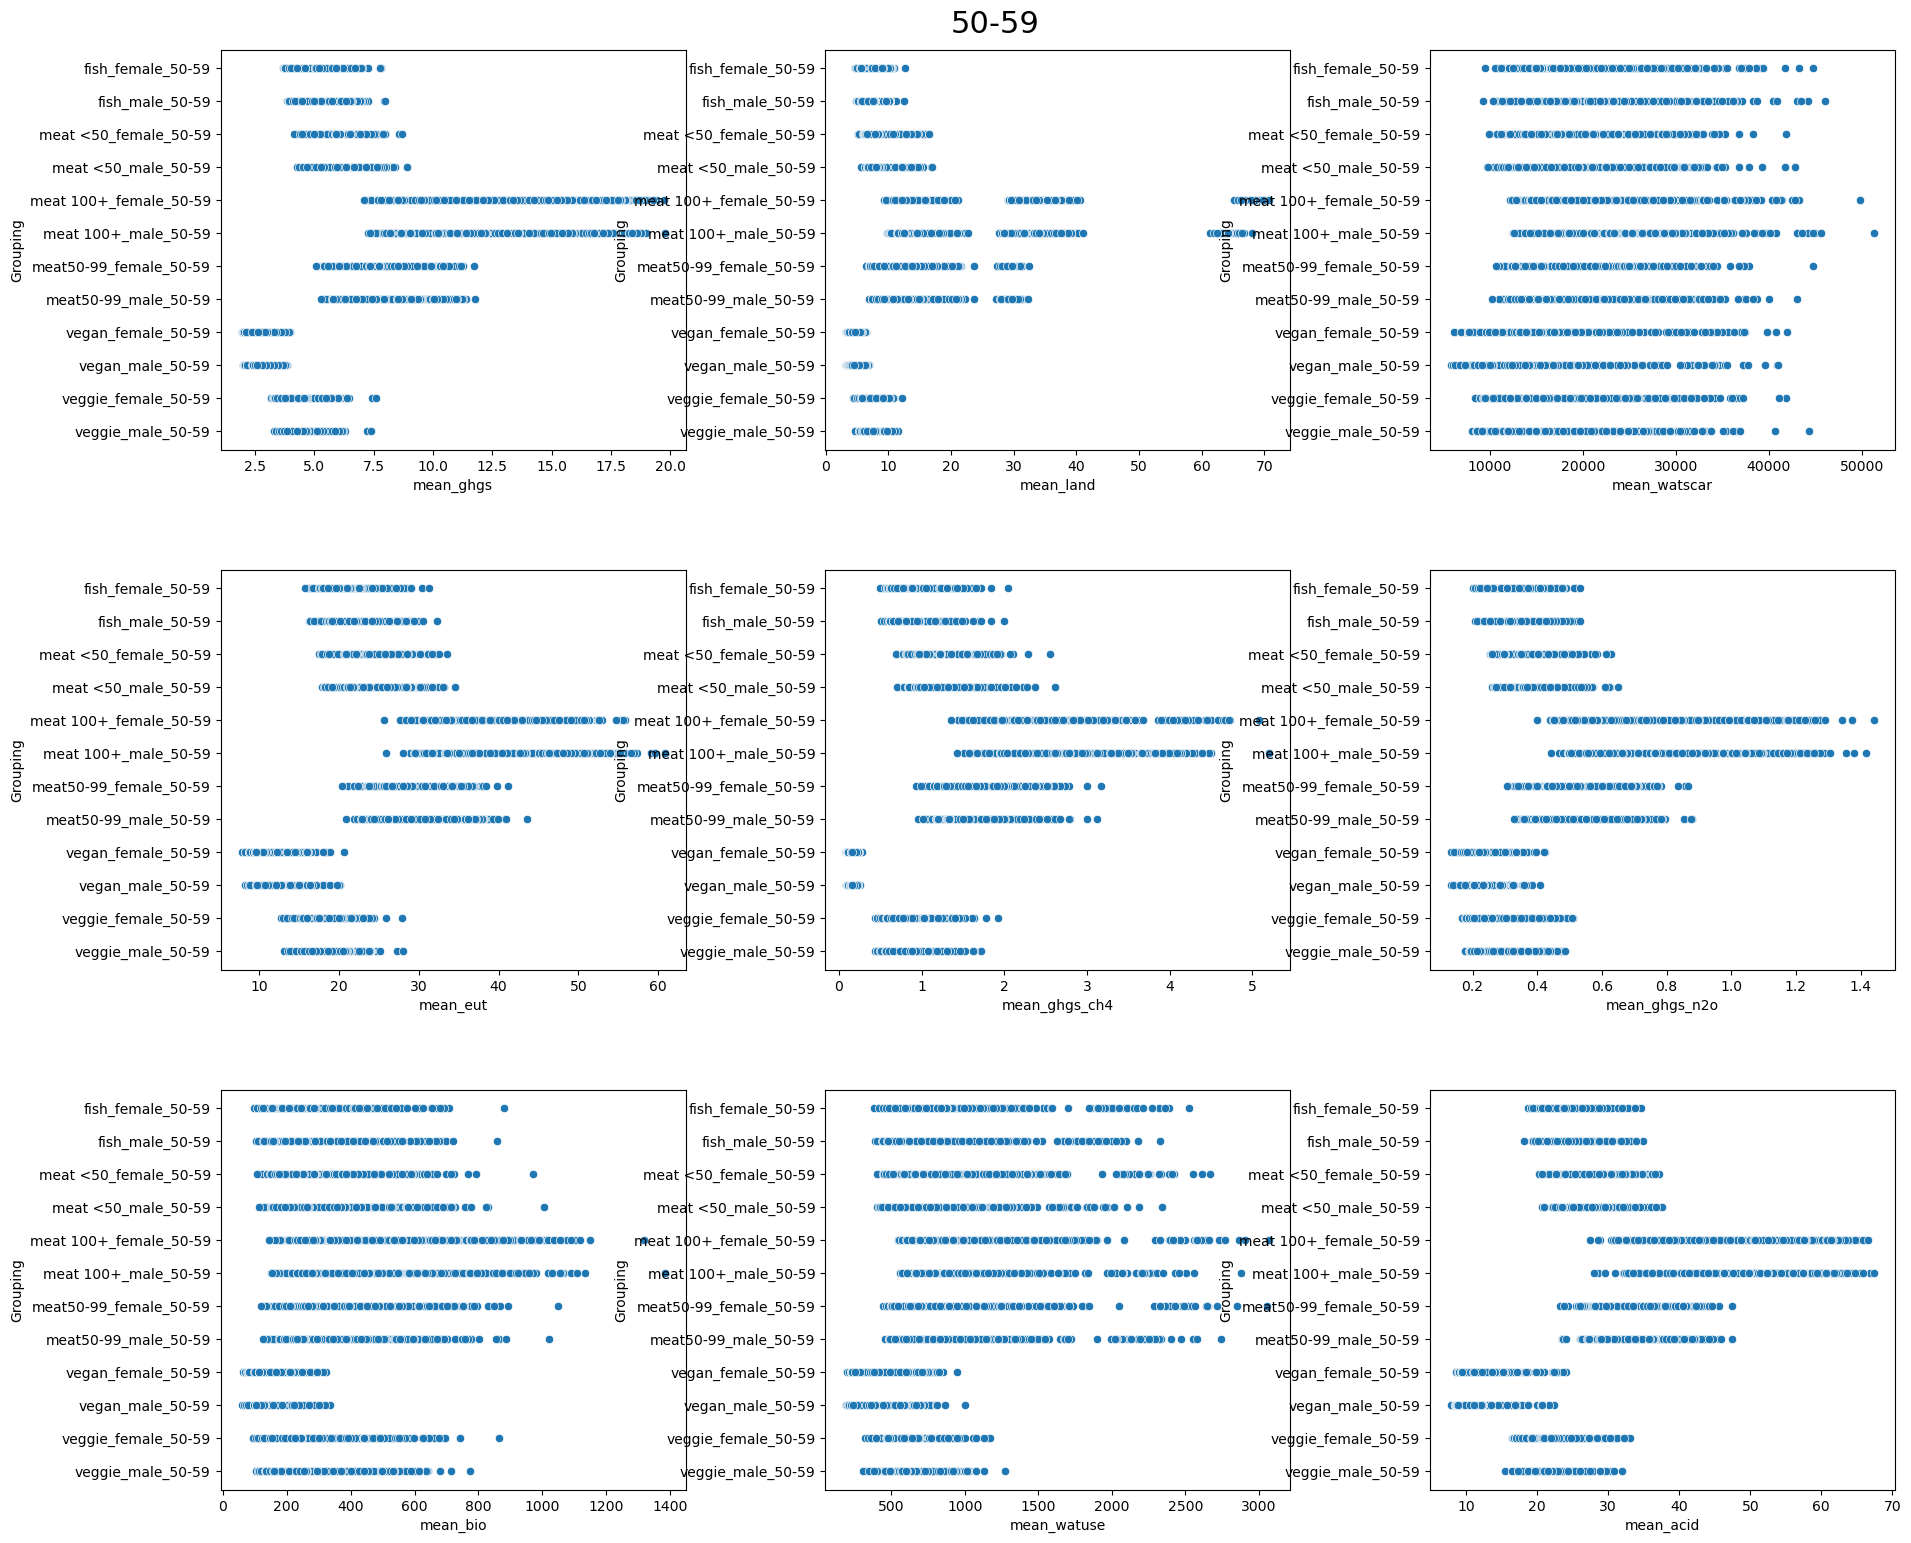

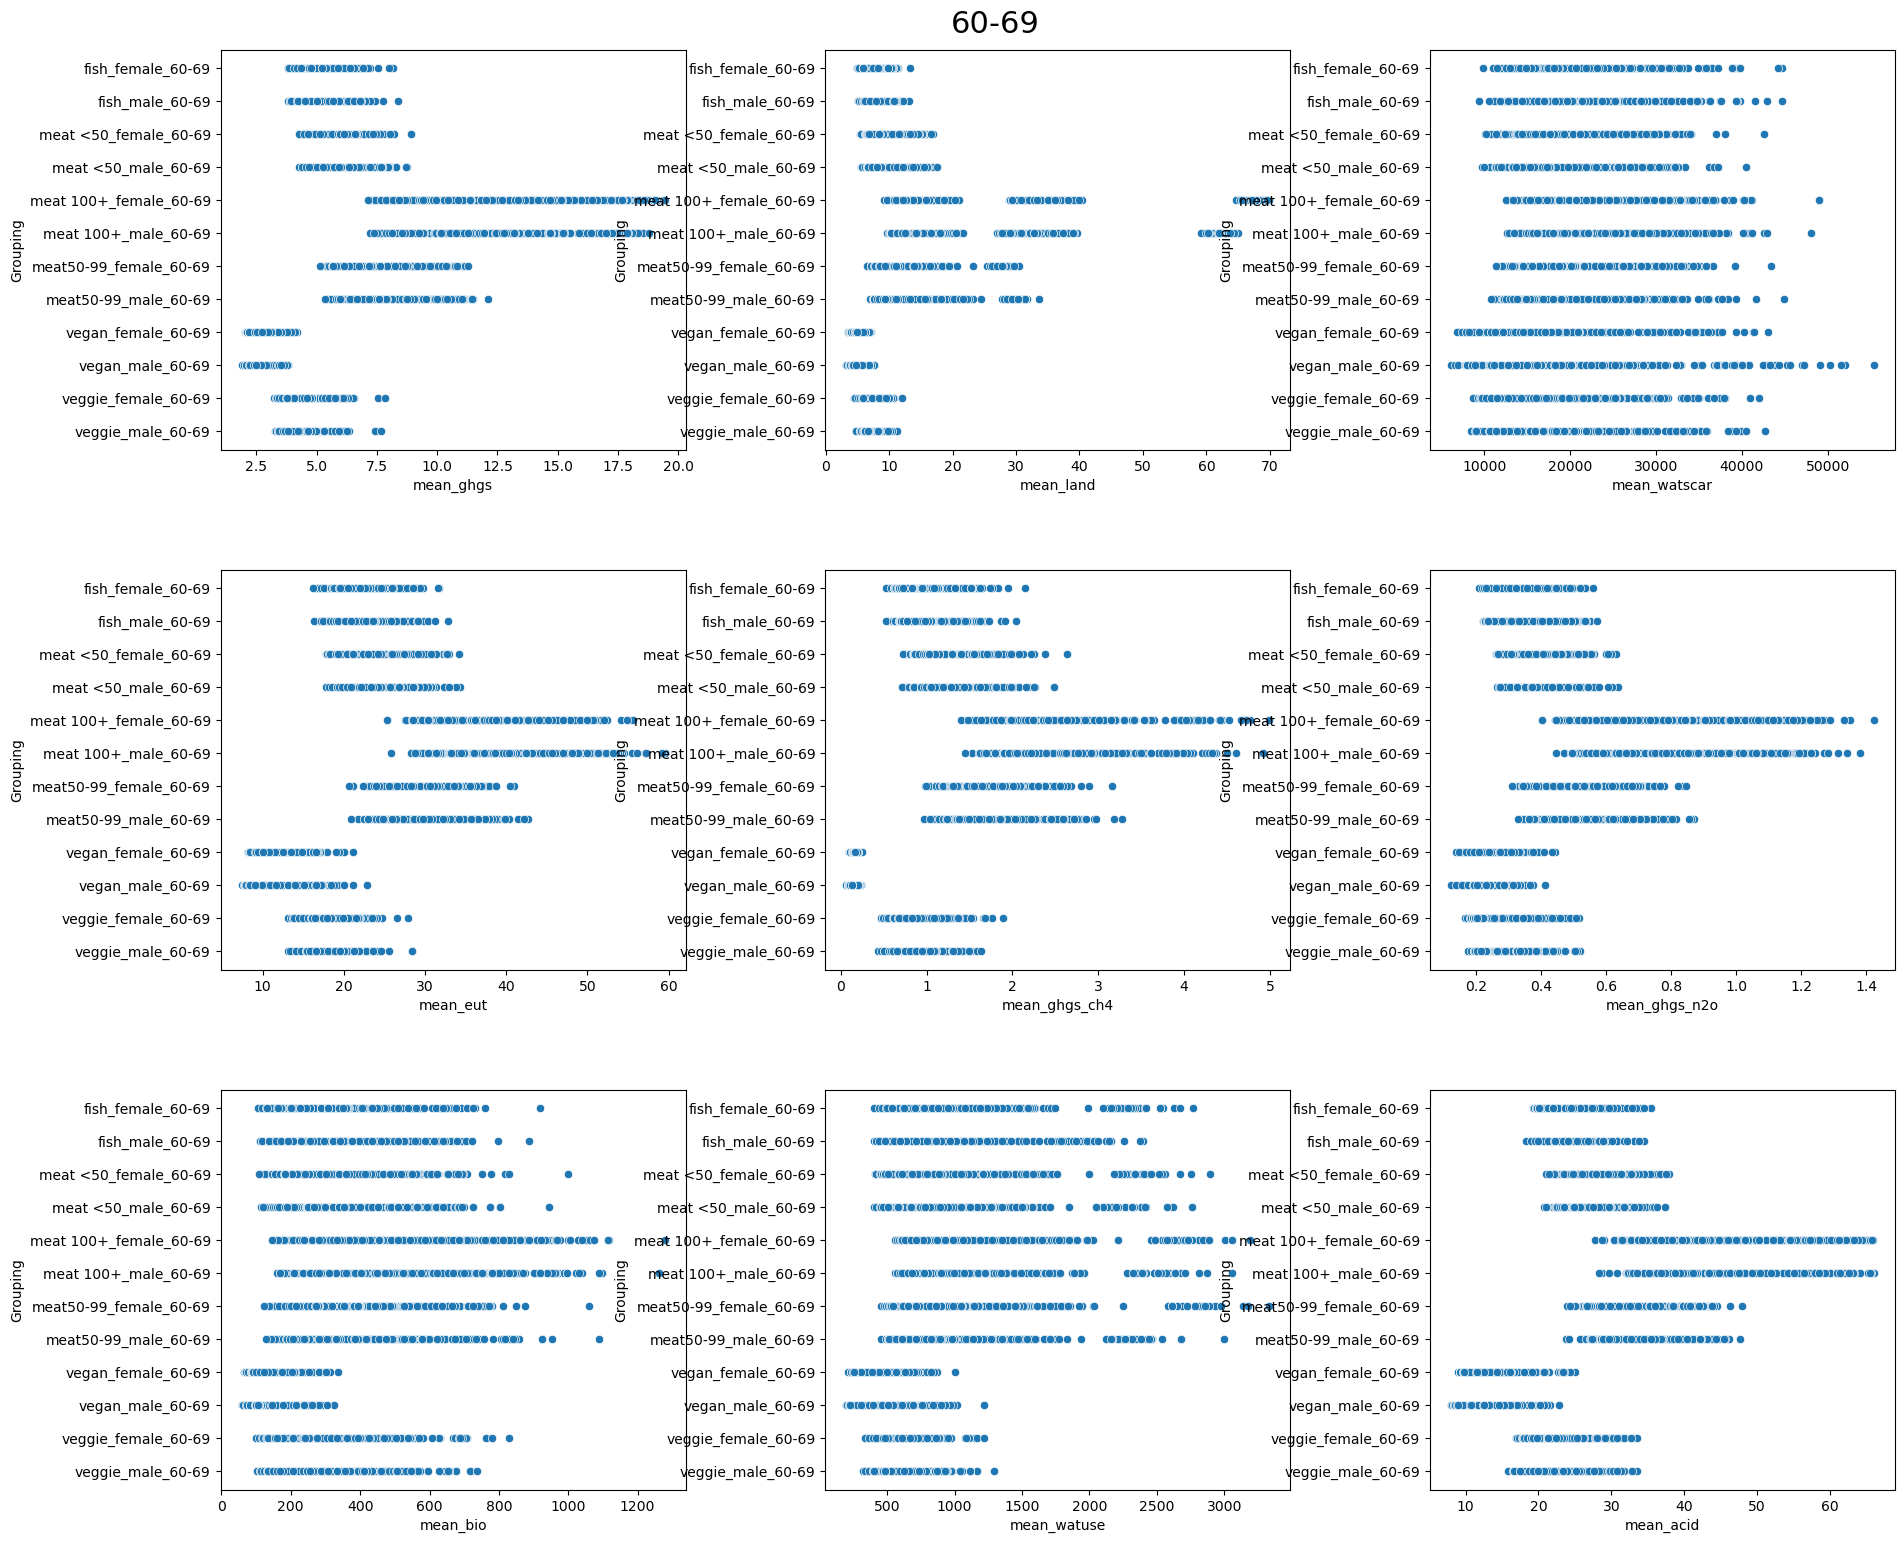

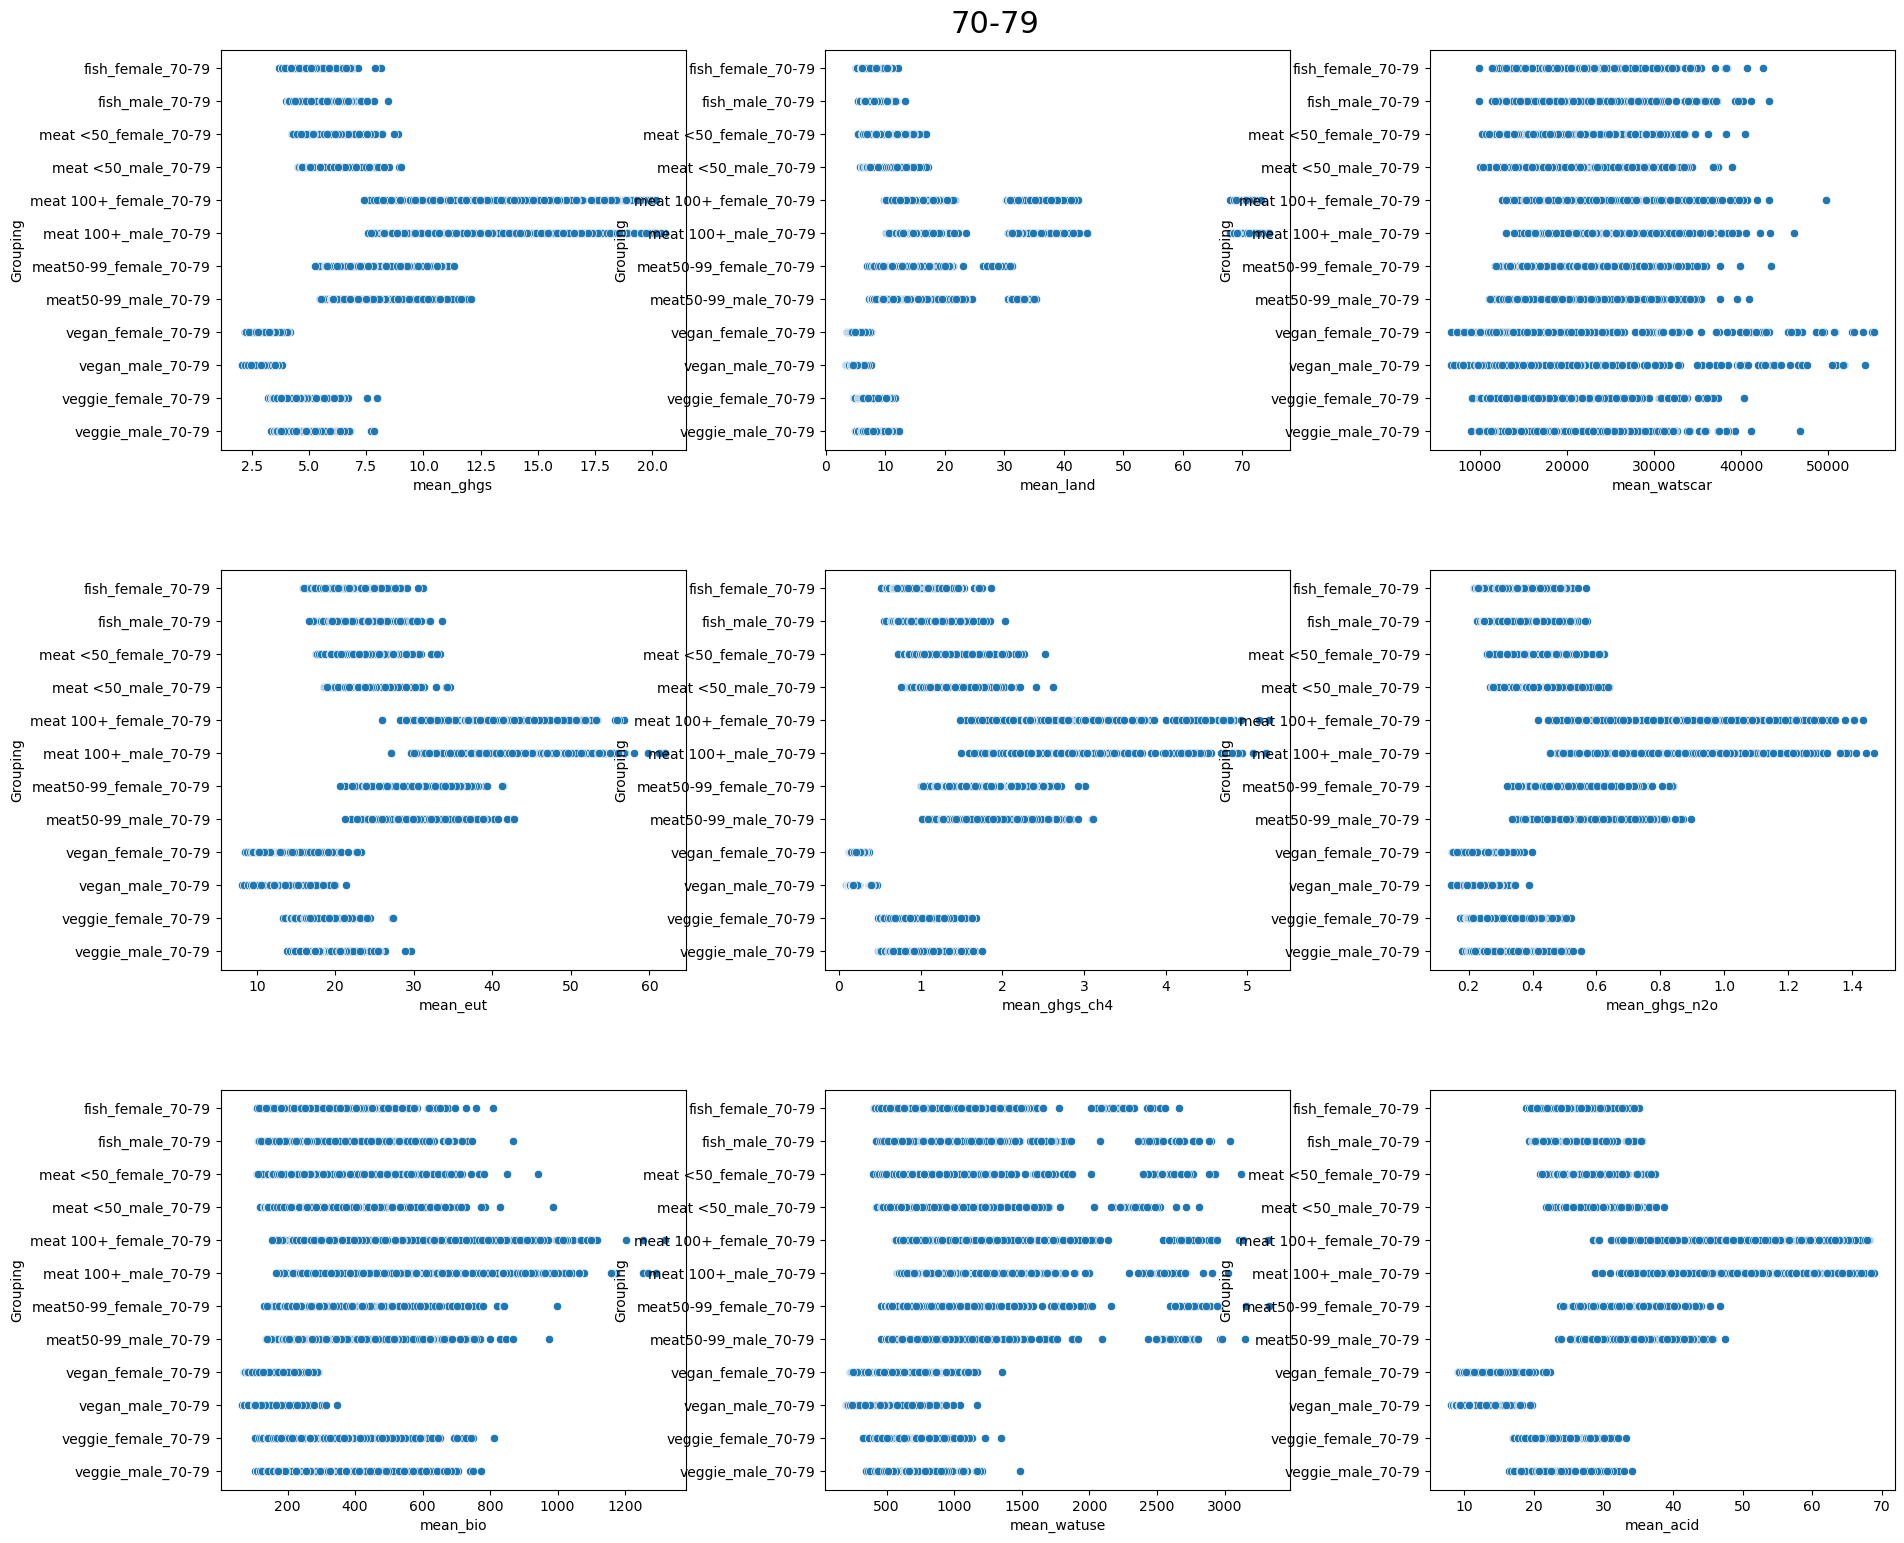

In [77]:


age_together = df.groupby('age_group')
labels = ['mean_ghgs', 'mean_land', 'mean_watscar', 'mean_eut', 'mean_ghgs_ch4', 'mean_ghgs_n2o', 'mean_bio', 'mean_watuse', 'mean_acid']

for group_name, group_data in age_together:
    # Determine the number of rows and columns for the subplots grid
    num_variables = min(len(labels), 9)
    num_rows = (num_variables - 1) // 3 + 1  # Calculate the number of rows needed
    num_cols = min(num_variables, 3)  # Maximum of 3 columns
    
    # Create a new figure and a grid of subplots
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 16))
    
    # Loop over each variable of interest
    for i, column in enumerate(labels[:num_variables]):
        # Calculate the row and column indices for the current subplot
        row = i // num_cols
        col = i % num_cols
        # Select the corresponding subplot
        ax = axes[row, col]
        # Create a scatter plot for the current variable
        sns.scatterplot(data=group_data, x=column, y='grouping', ax=ax)
        # Set labels for the axes
        ax.set_xlabel(column)
        ax.set_ylabel('Grouping')
    
    # Adjust layout and spacing of subplots
    plt.tight_layout()
    # Add a title to the entire figure
    plt.suptitle(group_name, fontsize=22, y=0.975)
    plt.subplots_adjust(top=0.95, bottom=0.05, right=0.95, hspace=0.3, wspace=0.3)
    # Display the figure with all the subplots
    plt.show()


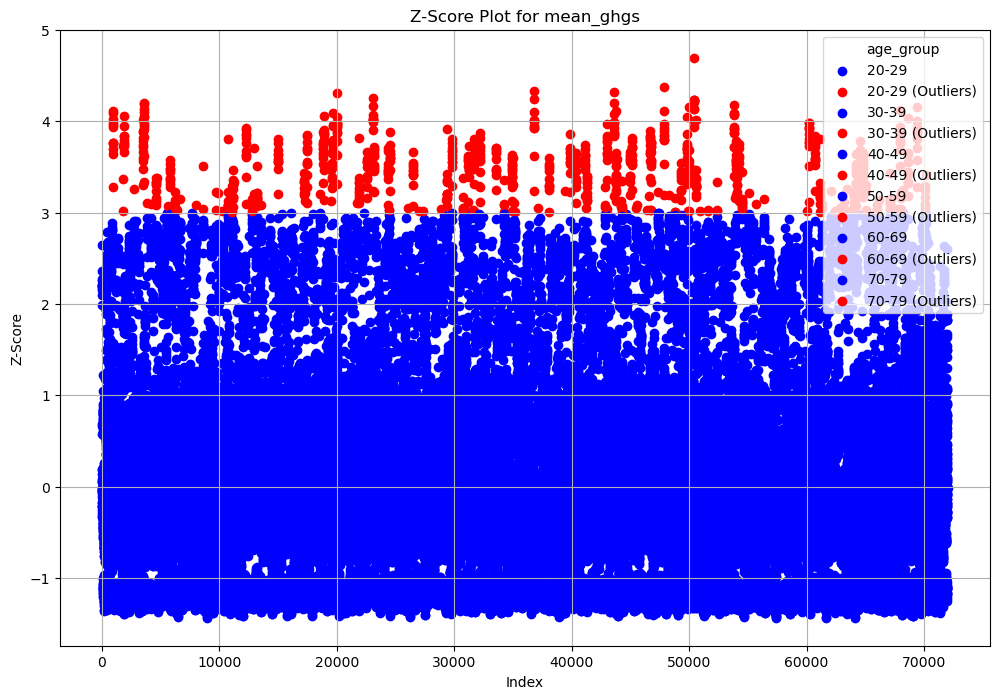

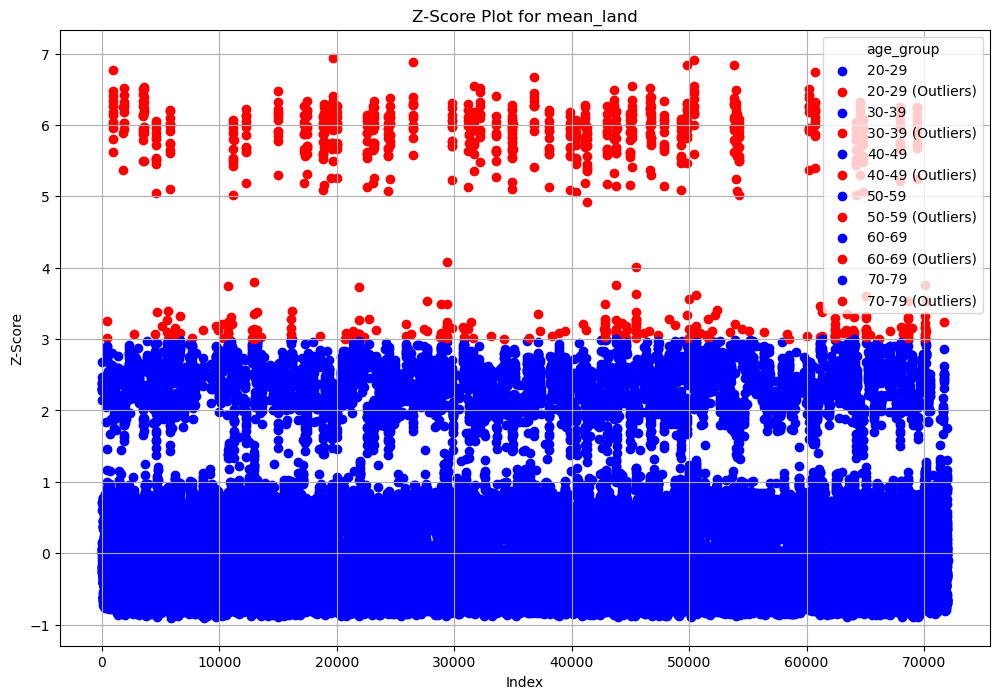

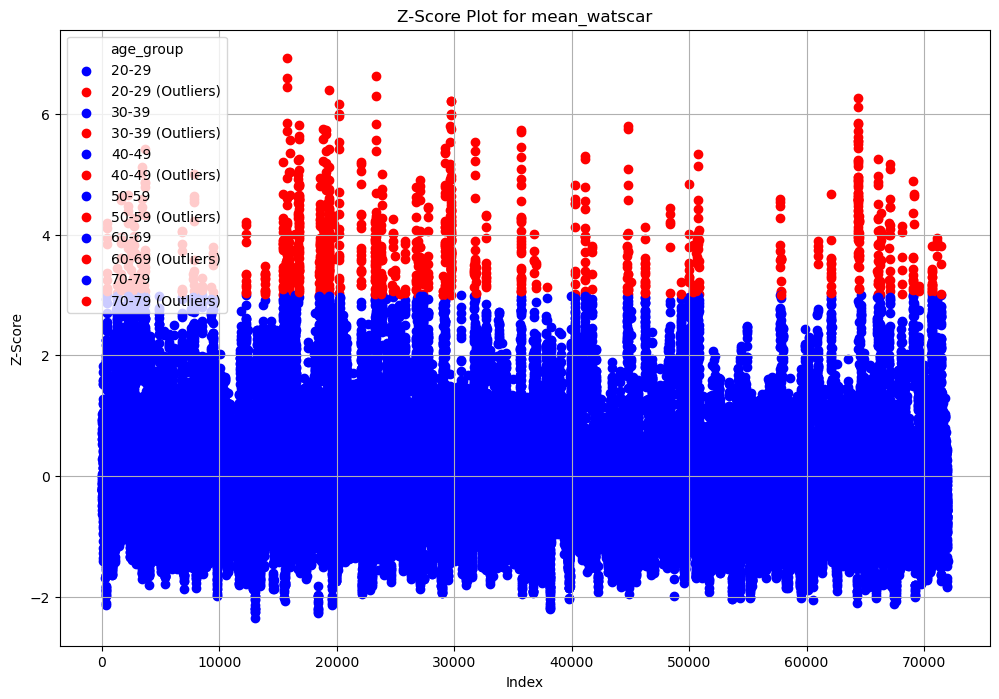

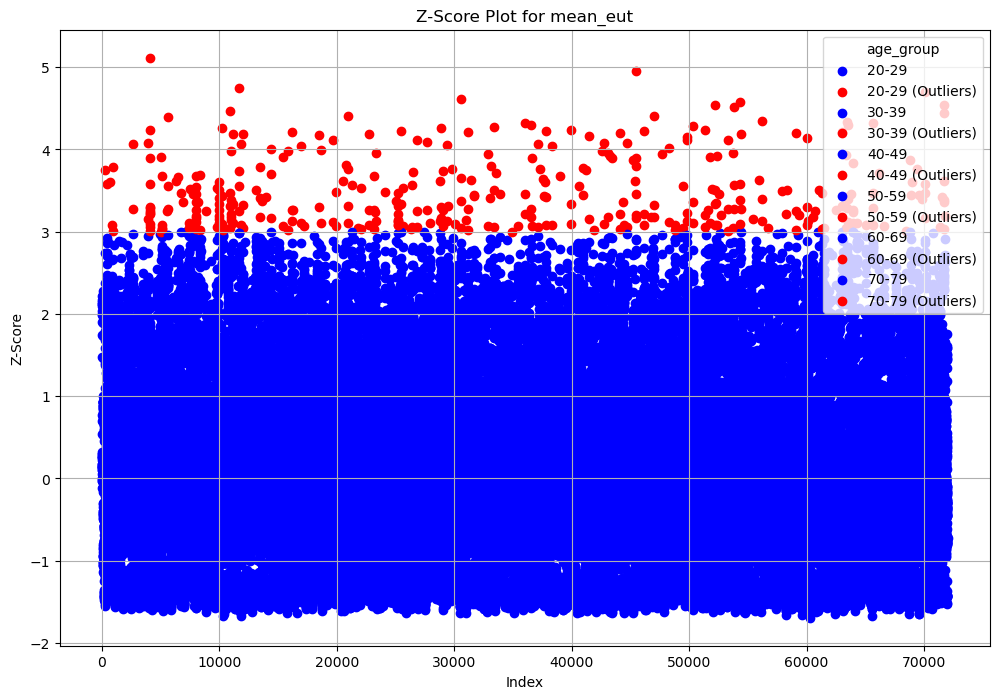

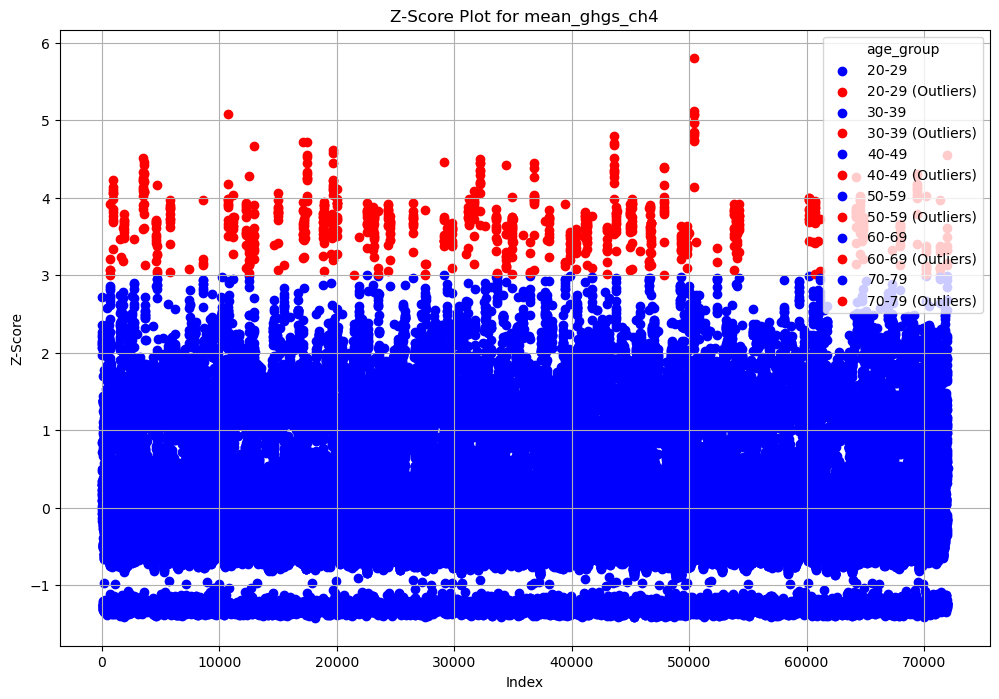

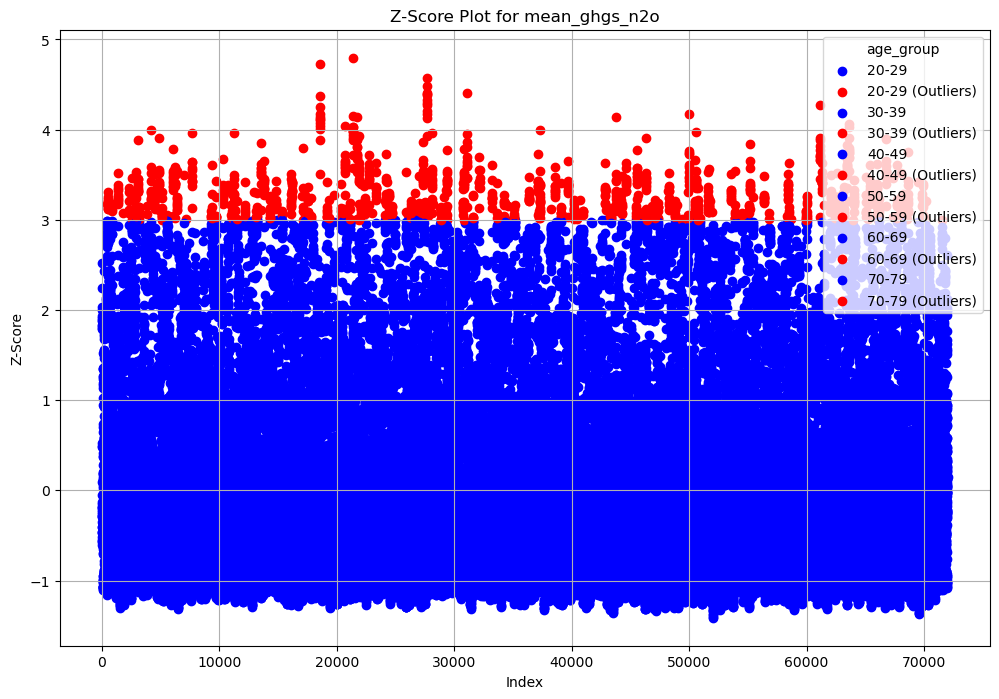

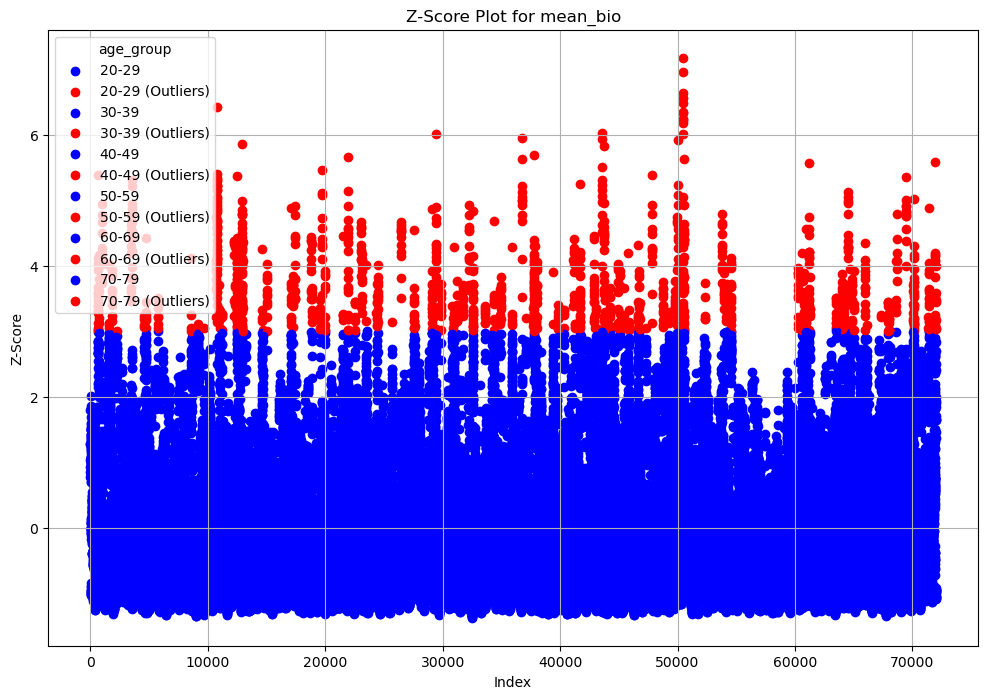

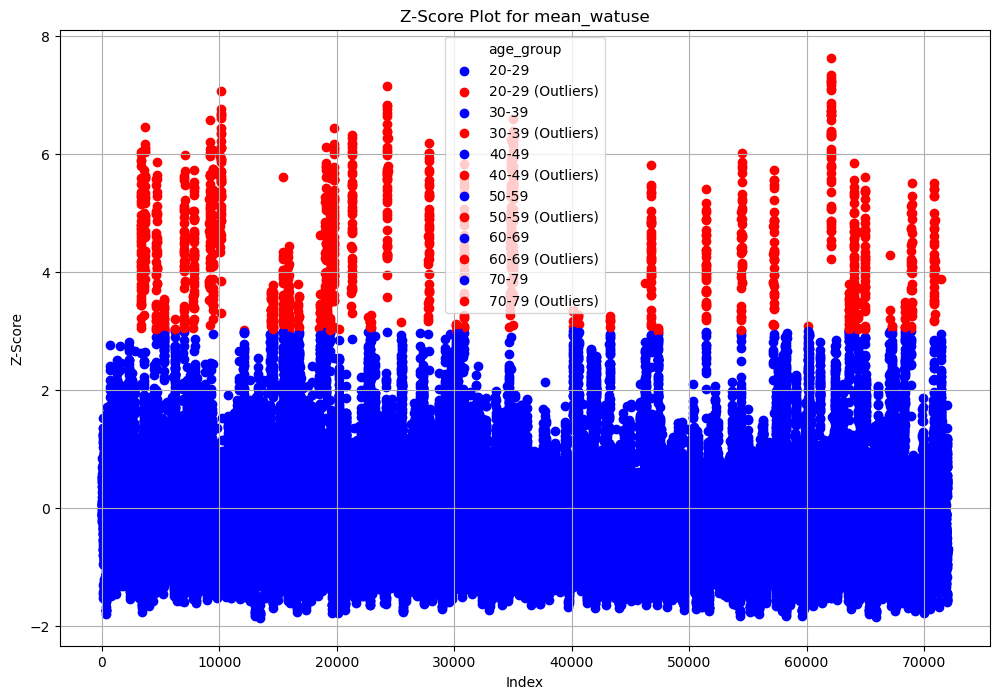

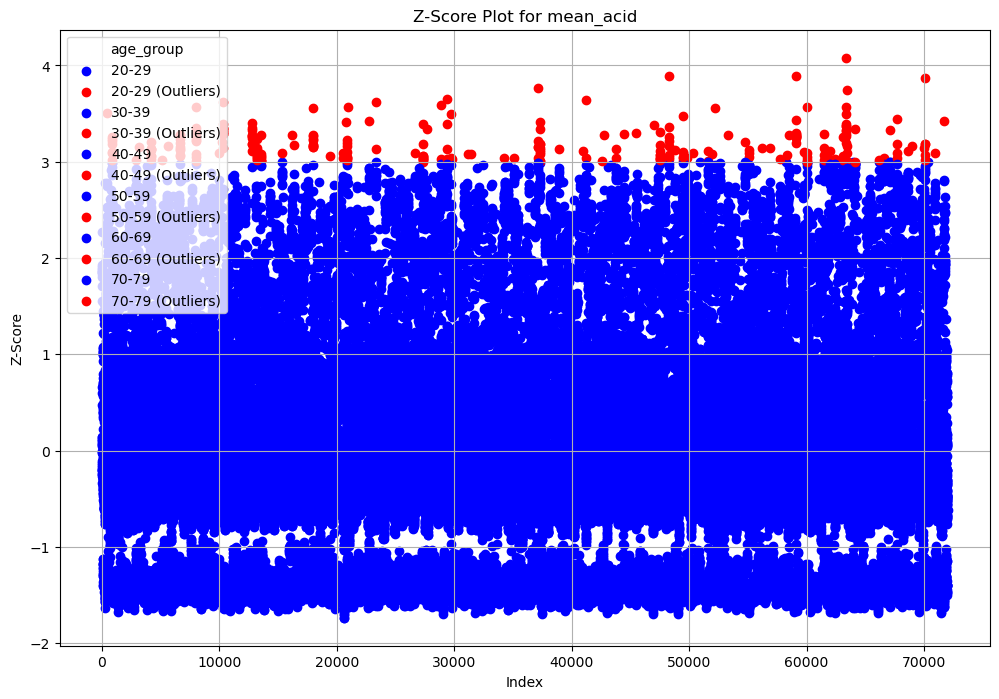

In [78]:
from scipy.stats import zscore

# Group the DataFrame by 'age_group'
age_together = df.groupby('age_group')

# Define the variables of interest
labels = ['mean_ghgs', 'mean_land', 'mean_watscar', 'mean_eut', 'mean_ghgs_ch4', 'mean_ghgs_n2o', 'mean_bio', 'mean_watuse', 'mean_acid']

# Define a threshold for identifying outliers
threshold = 3

# Loop over each variable
for variable in labels:
    plt.figure(figsize=(12, 8))
    plt.title(f'Z-Score Plot for {variable}')
    
    # Loop over each group
    for group_name, group_data in age_together:
        # Calculate Z-Scores for the variable's data in the group
        z_scores = zscore(group_data[variable])
        
        # Identify outliers based on the threshold
        outliers = abs(z_scores) > threshold
        
        # Plot the data points with outliers in red and non-outliers in blue
        plt.scatter(group_data.index[~outliers], z_scores[~outliers], label=group_name, color='blue')
        plt.scatter(group_data.index[outliers], z_scores[outliers], label=f'{group_name} (Outliers)', color='red')
    
    plt.xlabel('Index')
    plt.ylabel('Z-Score')
    plt.legend(title='age_group')
    plt.grid(True)
    plt.show()


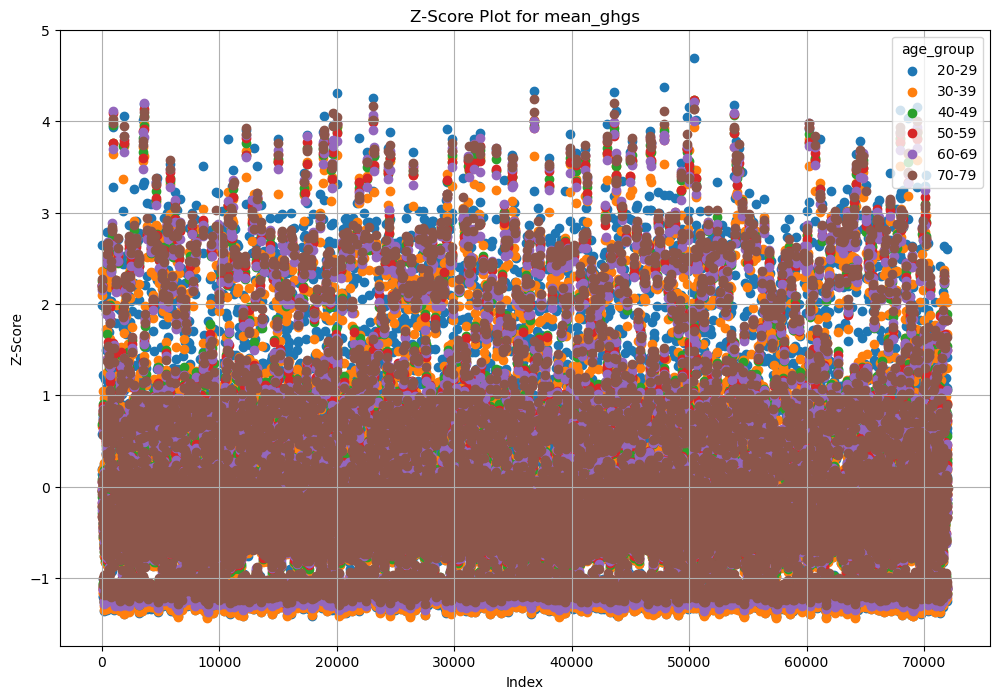

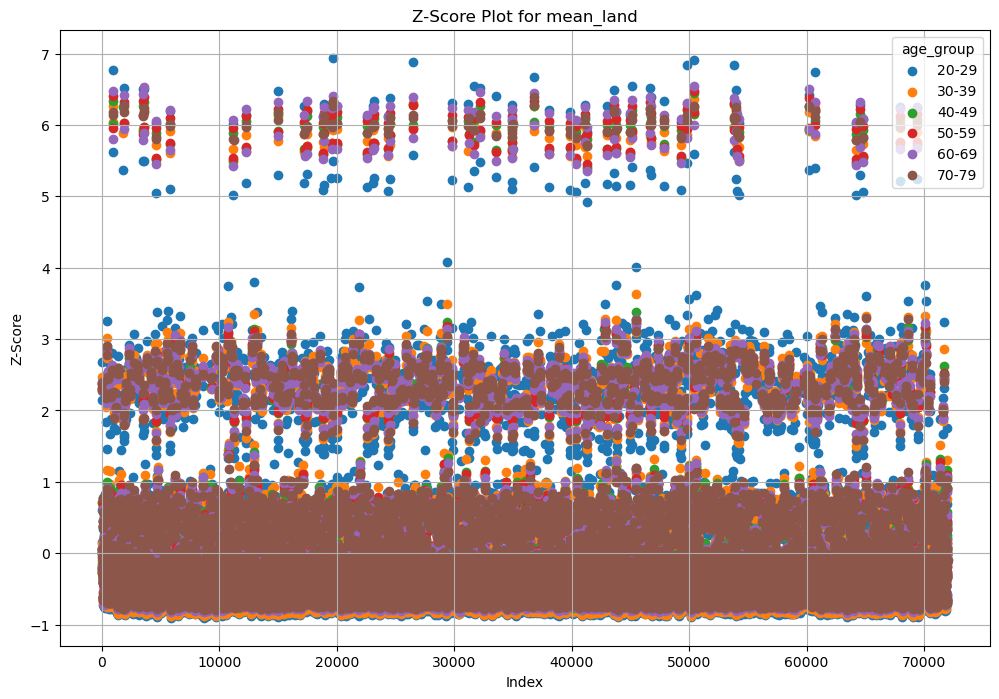

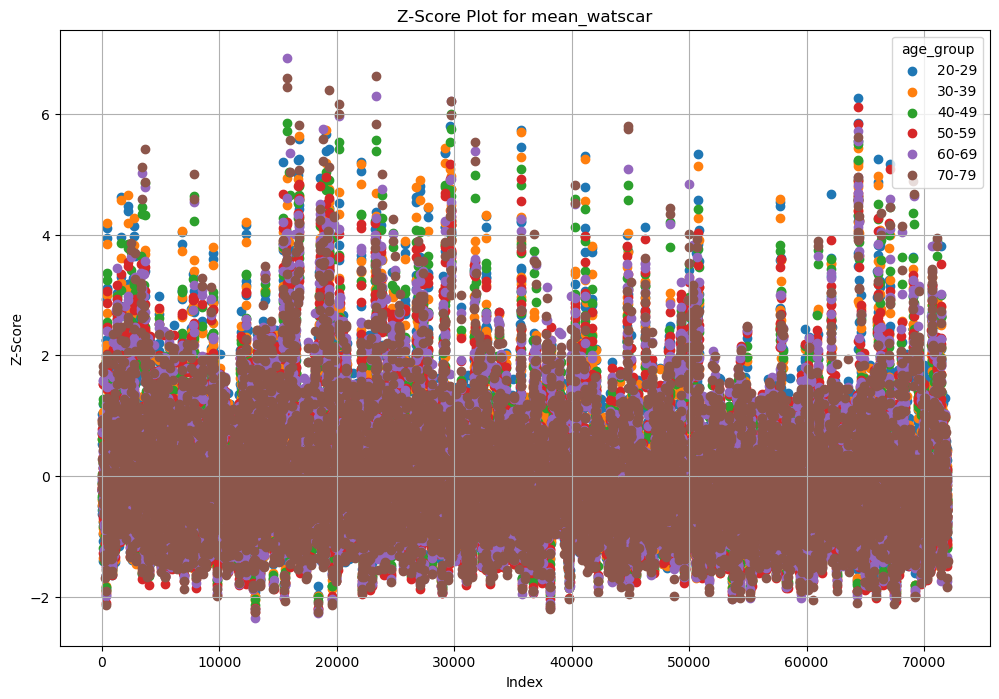

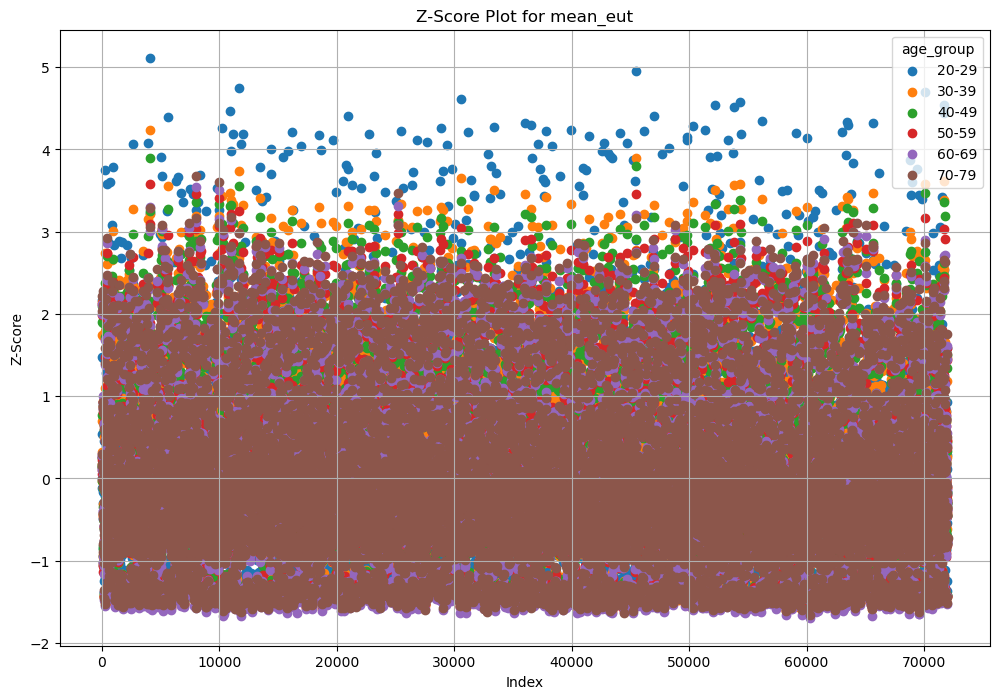

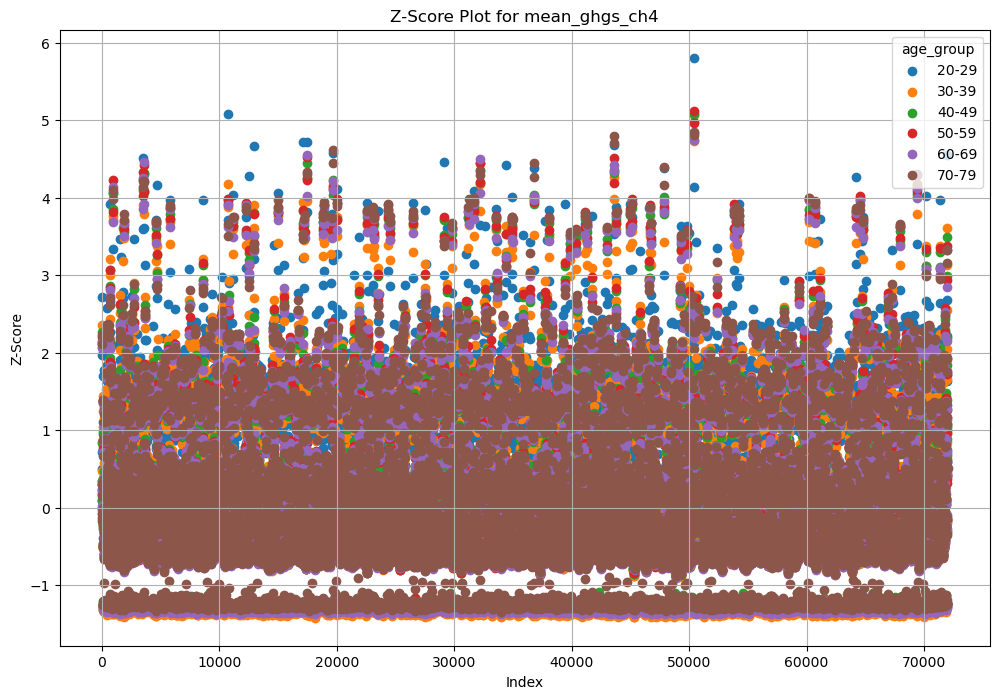

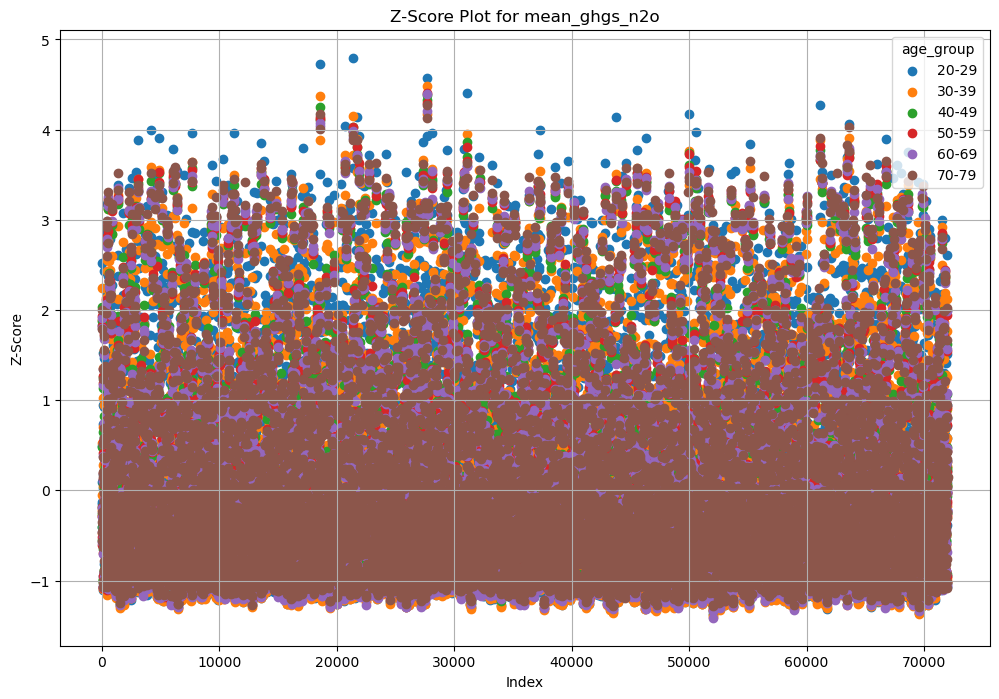

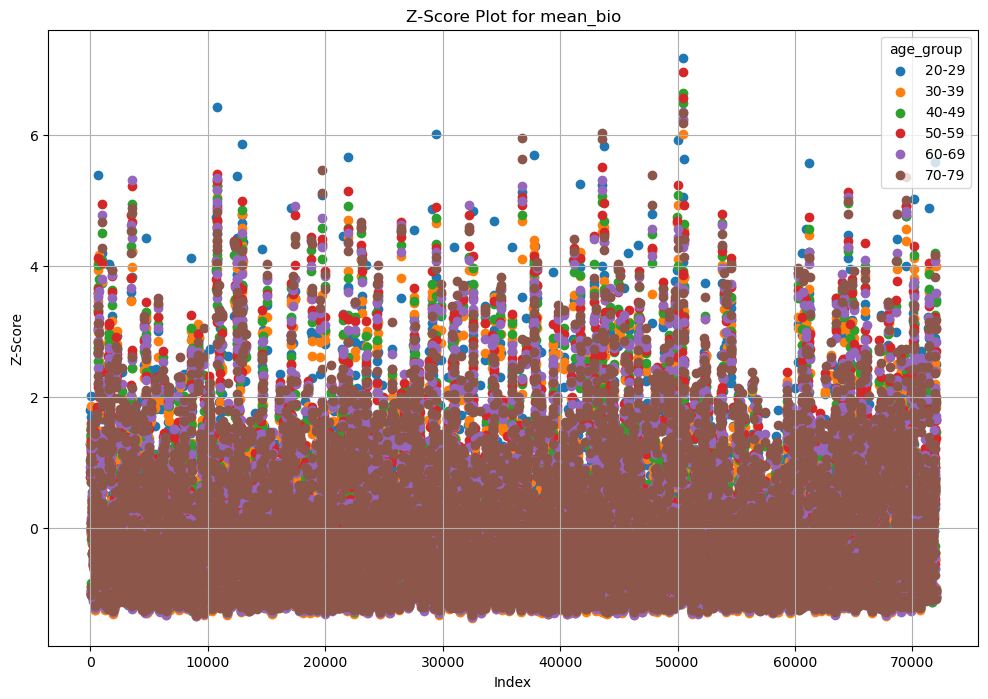

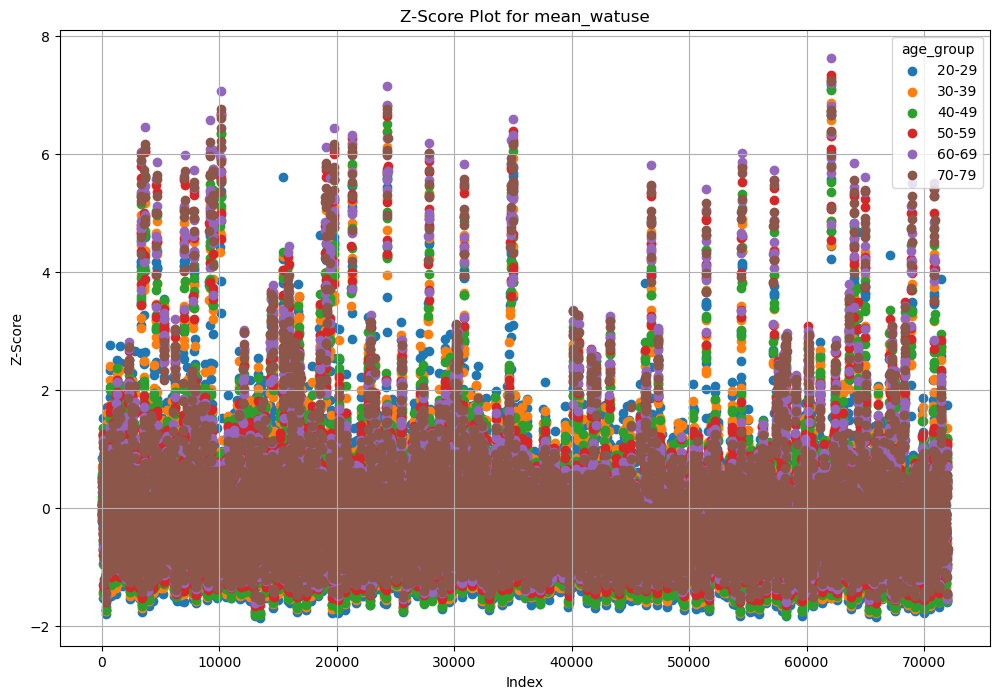

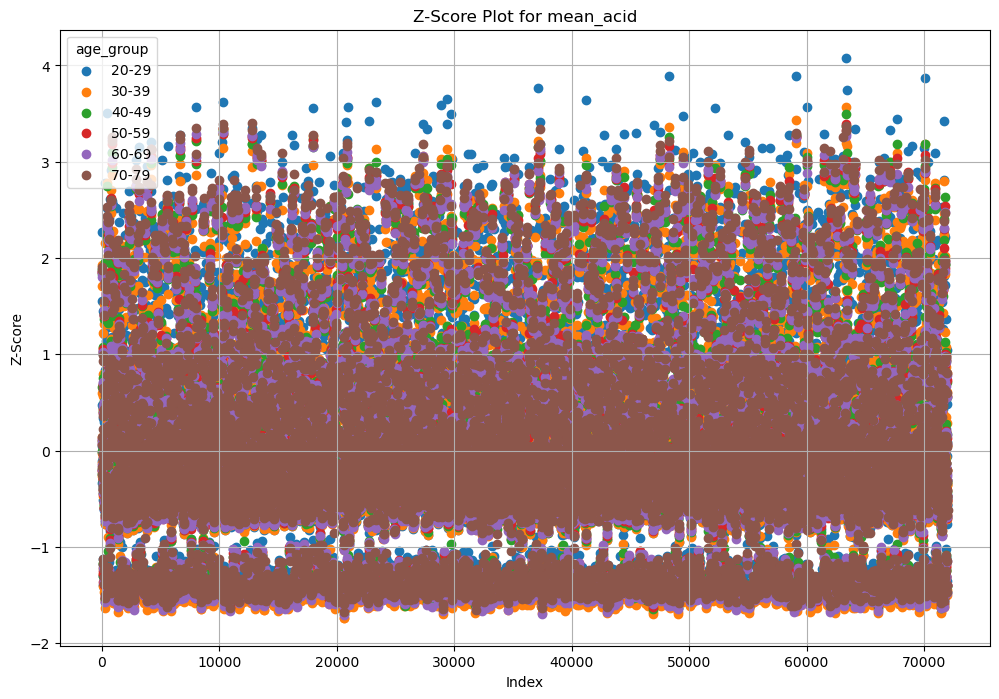

    mc_run_id                grouping  mean_ghgs  mean_land  mean_watscar  \
5           1       fish_female_70-79   5.261443   8.590993   18956.45472   
11          1         fish_male_70-79   5.660791   9.220472   20524.53505   
17          1   meat <50_female_70-79   6.108421  10.844592   17911.83716   
23          1     meat <50_male_70-79   6.599423  11.866794   18302.94332   
29          1  meat 100+_female_70-79  13.635384  33.998877   23793.60493   
35          1    meat 100+_male_70-79  13.966586  34.900930   24031.79369   
41          1  meat50-99_female_70-79   8.278411  17.077793   20538.54469   
47          1    meat50-99_male_70-79   8.829175  19.001205   20198.31942   
53          1      vegan_female_70-79   3.037842   5.322582   16619.17539   
59          1        vegan_male_70-79   2.796317   4.890431   16497.81153   

     mean_eut  mean_ghgs_ch4  mean_ghgs_n2o    mean_bio  mean_watuse  ...  \
5   24.722737       1.072914       0.318862  421.190892   737.551714  ...  

In [79]:
from scipy.stats import zscore

# Group the DataFrame by 'age_group'
age_together = df.groupby('age_group')

# Define the variables of interest
labels = ['mean_ghgs', 'mean_land', 'mean_watscar', 'mean_eut', 'mean_ghgs_ch4', 'mean_ghgs_n2o', 'mean_bio', 'mean_watuse', 'mean_acid']

# Define a threshold for identifying outliers
threshold = 3

# Loop over each variable
for variable in labels:
    plt.figure(figsize=(12, 8))
    plt.title(f'Z-Score Plot for {variable}')
    
    # Loop over each group
    for group_name, group_data in age_together:
        # Calculate Z-Scores for the variable's data in the group
        z_scores = zscore(group_data[variable])
        
        # Identify outliers based on the threshold
        outliers = abs(z_scores) > threshold
        
        # Replace outliers with the mean value of the group
        group_mean = group_data[variable].mean()
        group_data.loc[outliers, variable] = group_mean
        
        # Plot the data points
        plt.scatter(group_data.index, z_scores, label=group_name)
   
    plt.xlabel('Index')
    plt.ylabel('Z-Score')
    plt.legend(title='age_group')
    plt.grid(True)
    plt.show()
    
    
print(group_data.head(10))

In [81]:


# Define mappings for categorical variables
gender = {'female': 0, 'male': 1}
diet = {'fish': 0, 'meat50': 1, 'meat100': 2, 'meat': 3, 'vegan': 4, 'veggie': 5}
age = {'20-29': 0, '30-39': 1, '40-49': 2, '50-59': 3, '60-69': 4, '70-79': 5}

# Reverse mappings for converting back to original categorical values
re_gender = dict((v, k) for k, v in gender.items())
re_diet = dict((v, k) for k, v in diet.items())
re_age = dict((v, k) for k, v in age.items())


# Map categorical variables to numeric values
# df['sex'] = df['sex'].map(sex_mapping)
df['sex'].replace(gender, inplace=True)
df['diet_group'].replace(diet, inplace=True)
df['age_group'].replace(age, inplace=True)

# Group by 'grouping' and calculate mean
together = df.groupby('grouping',as_index= False).mean()

# Map numeric values back to original categorical values
together['sex'] = together['sex'].map(re_gender)
together['diet_group'] = together['diet_group'].map(re_diet)
together['age_group'] = together['age_group'].map(re_age)


C:\Users\yang\AppData\Local\Temp\ipykernel_35592\2448566029.py:14: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\yang\AppData\Local\Temp\ipykernel_35592\2448566029.py:14: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\yang\AppData\Local\Temp\ipykernel_35592\2448566029.py:15: FutureW

In [82]:
# Drop columns from 'grouped'
together = together.drop(['sd_ghgs', 'sd_land', 'sd_watscar', 'sd_eut', 'sd_ghgs_ch4', 'sd_ghgs_n2o', 'sd_bio', 'sd_watuse', 'sd_acid', 'n_participants'], axis=1)



### This treemap is a liitle bit hard to understand 

In [85]:
from pyecharts.charts import TreeMap
from pyecharts import options as opts

# Prepare data in hierarchical structure for the treemap
data = []
for sex_label in gender:
    for diet_label in diet:
        for age_label in age:            
            filtered_df = together[(together['sex'] == sex_label) & 
                             (together['age_group'] == age_label) & 
                             (together['diet_group'] == diet_label)]
            # Calculate the sum of 'mean_ghgs_n2o' for the filtered data
            total_mean_ghgs_n2o = filtered_df['mean_ghgs_n2o'].sum()
            # Append data to hierarchical structure
            data.append({"value": total_mean_ghgs_n2o, "name": f"{sex_label}-{diet_label}-{age_label}"})

# Create the treemap
treemap = (
    TreeMap()
    .add("Treemap", data)
    .set_global_opts(title_opts=opts.TitleOpts(title="Treemap"))
)

# Render the chart
treemap.render("treemap_pyecharts.html")


'd:\\file\\ResearchMethod\\Coursework\\CourseWork2\\CourseWork2\\treemap_pyecharts.html'

In [83]:
together

grouping  mc_run_id  mean_ghgs  mean_land  mean_watscar  \
0   fish_female_20-29      500.5   4.902947   6.489031  17131.963352   
1   fish_female_30-39      500.5   4.942664   6.515886  17652.628540   
2   fish_female_40-49      500.5   4.927040   6.540682  17729.964756   
3   fish_female_50-59      500.5   4.944320   6.566172  18446.193259   
4   fish_female_60-69      500.5   5.103823   6.866635  18922.366831   
..                ...        ...        ...        ...           ...   
67  veggie_male_30-39      500.5   4.807758   6.787163  16603.476202   
68  veggie_male_40-49      500.5   4.610379   6.610474  16477.661724   
69  veggie_male_50-59      500.5   4.455095   6.522068  16333.409315   
70  veggie_male_60-69      500.5   4.444844   6.628730  16725.207750   
71  veggie_male_70-79      500.5   4.612451   6.842653  17972.881279   

     mean_eut  mean_ghgs_ch4  mean_ghgs_n2o    mean_bio  mean_watuse  \
0   20.985464       0.842864       0.322486  248.135212   759.237211   
1   20.948442       0.836500       0.321971  249.827684   759.629613   
2   20.713798       0.841106       0.320413  252.846922   748.488755   
3   20.989284       0.834881       0.323892  246.789912   788.932276   
4   21.569322       0.879670       0.336023  258.645759   819.856604   
..        ...            ...            ...         ...          ...   
67  18.988080       0.811991       0.316326  266.148897   594.307015   
68  18.275813       0.764687       0.304605  251.351926   576.240665   
69  17.619071       0.733031       0.299523  244.248429   559.640001   
70  17.543012       0.738550       0.305724  248.603854   566.825960   
71  18.283813       0.794673       0.319633  259.421351   602.571533   

    mean_acid     sex diet_group age_group  
0   22.770956  female       fish     20-29  
1   23.257771  female       fish     30-39  
2   23.470170  female       fish     40-49  
3   23.652474  female       fish     50-59  
4   24.455240  female       fish     60-69  
..        ...     ...        ...       ...  
67  22.864091    male     veggie     30-39  
68  21.866199    male     veggie     40-49  
69  21.186608    male     veggie     50-59  
70  21.321332    male     veggie     60-69  
71  22.133811    male     veggie     70-79  

[72 rows x 14 columns]

### This treemap is better

In [84]:


import plotly.express as px

# Sort the DataFrame by the values of "mean_watuse" in descending order
df_sorted = together.sort_values(by='mean_watuse', ascending=False)

# Creating the treemap
fig = px.treemap(df_sorted, 
                 path=['age_group','sex', 'diet_group'], 
                 values='mean_ghgs_n2o',
                 color='mean_watuse', 
                 hover_data=['grouping'], 
                 color_continuous_scale='tealrose',
                 color_continuous_midpoint=df_sorted['mean_watuse'].mean())

# Customizing layout and increasing plot size
fig.update_layout(title='Treemap:Water uses and N2O emission in different diet',
                  title_x=0.5,
                  height=800,  # adjust height
                  width=1000)  # adjust width

# Show the plot
fig.show()
